# 🔵 Single Neuron - The Building Block

Welcome back! In the previous notebook, we learned what neural networks are at a high level. Now we're going to get our hands dirty and **build a neuron from scratch**!

## 🎯 What You'll Learn

By the end of this notebook, you'll be able to:
- Understand the exact math behind a single neuron
- Implement a neuron using Python and NumPy
- Visualize what a neuron does
- Understand the role of weights and bias
- See how changing weights affects predictions

**Prerequisites:** Basic Python (loops, functions) and the concepts from Notebook 1.

---
## 🎬 Analogy: A Neuron as a Decision Maker

Before we dive into code, let's build intuition with a real-world example.

### Scenario: Should You Buy This Coffee? ☕

Imagine you're deciding whether to buy a cup of coffee. You consider:

1. **Price** ($5.00)
2. **Size** (16 oz)
3. **Quality rating** (4.5 stars)

But these factors don't all matter equally to you:
- Price is **very important** (weight = 0.5)
- Size is **somewhat important** (weight = 0.3)
- Quality is **moderately important** (weight = 0.4)

You also have a **baseline preference** - you generally like coffee, so you're already leaning towards buying it (+2 points).

### The Calculation:

```
Decision Score = (Price × Price_Weight) + (Size × Size_Weight) + (Quality × Quality_Weight) + Baseline

Decision Score = (5.0 × 0.5) + (16 × 0.3) + (4.5 × 0.4) + 2
               = 2.5 + 4.8 + 1.8 + 2
               = 11.1
```

If the score is above some threshold (let's say 10), you buy it!

**This is EXACTLY how a neuron works!** 🎉

- **Inputs** = Price, Size, Quality
- **Weights** = How much you care about each factor
- **Bias** = Your baseline preference
- **Output** = Your decision score

---
## 🧮 The Math Behind a Neuron

Now let's formalize this with math (don't worry, it's just multiplication and addition!).

### The Neuron Formula

A neuron computes:

$$\text{output} = (x_1 \times w_1) + (x_2 \times w_2) + (x_3 \times w_3) + ... + b$$

Or more compactly:

$$\text{output} = \sum_{i=1}^{n} (x_i \times w_i) + b$$

Where:
- $x_i$ = inputs (the data)
- $w_i$ = weights (importance of each input)
- $b$ = bias (baseline adjustment)
- $\sum$ = sum symbol (add them all up)

### Breaking It Down

1. **Multiply each input by its weight**: This scales each input by its importance
2. **Add them all together**: This combines all the weighted inputs
3. **Add the bias**: This shifts the result up or down

**That's it!** A neuron is just a weighted sum plus a bias. No magic!

---
## 💻 Let's Code: The Simplest Neuron

We'll build a neuron step by step, starting with the simplest version and gradually making it more sophisticated.

In [ ]:
# First, import NumPy - we'll use it for efficient numerical operations
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
# This ensures we get the same random numbers each time we run the code
np.random.seed(42)

### Version 1: Single Input, Single Weight

In [22]:
def simple_neuron(input_value, weight, bias):
    """
    The simplest possible neuron: one input, one weight.
    
    Think of it like this:
    - input_value: How many hours you studied
    - weight: How effective each hour of studying is
    - bias: Your baseline knowledge (before studying)
    
    Args:
        input_value (float): The input value
        weight (float): How important this input is
        bias (float): Baseline adjustment
    
    Returns:
        float: The neuron's output
    """
    # Multiply input by weight, then add bias
    output = (input_value * weight) + bias
    return output

# Let's test it!
hours_studied = 5.0  # Input: studied for 5 hours
study_effectiveness = 2.0  # Weight: each hour is worth 2 points
baseline_knowledge = 10.0  # Bias: started with 10 points of knowledge

test_score = simple_neuron(hours_studied, study_effectiveness, baseline_knowledge)

print(f"📚 Study Example:")
print(f"   Hours studied: {hours_studied}")
print(f"   Study effectiveness (weight): {study_effectiveness}")
print(f"   Baseline knowledge (bias): {baseline_knowledge}")
print(f"   Predicted test score: {test_score}")
print(f"\n   Calculation: ({hours_studied} × {study_effectiveness}) + {baseline_knowledge} = {test_score}")

📚 Study Example:
   Hours studied: 5.0
   Study effectiveness (weight): 2.0
   Baseline knowledge (bias): 10.0
   Predicted test score: 20.0

   Calculation: (5.0 × 2.0) + 10.0 = 20.0


### Version 2: Multiple Inputs (Using a Loop)

In [23]:
def neuron_with_loop(inputs, weights, bias):
    """
    A neuron with multiple inputs, implemented using a loop.
    
    This is more realistic - most neurons have multiple inputs!
    
    Args:
        inputs (list): List of input values [x1, x2, x3, ...]
        weights (list): List of weights [w1, w2, w3, ...]
        bias (float): Bias value
    
    Returns:
        float: The neuron's output
    """
    # Start with the bias
    output = bias
    
    # Loop through each input and its corresponding weight
    for input_value, weight in zip(inputs, weights):
        # Multiply input by weight and add to running total
        output += input_value * weight
    
    return output

# Example: Predicting if a student will pass based on multiple factors
student_data = [
    5.0,   # Hours studied per day
    85.0,  # Previous test score
    7.0    # Hours of sleep
]

# These weights represent how important each factor is
importance_weights = [
    0.3,   # Study hours are somewhat important
    0.7,   # Previous scores are very important
    0.2    # Sleep is less important (but still matters!)
]

baseline_score = -50.0  # Bias: starting baseline

predicted_score = neuron_with_loop(student_data, importance_weights, baseline_score)

print(f"🎓 Student Pass Prediction:")
print(f"   Study hours/day: {student_data[0]}")
print(f"   Previous test score: {student_data[1]}")
print(f"   Sleep hours: {student_data[2]}")
print(f"\n   Predicted score: {predicted_score:.2f}")
print(f"   Will pass? {'Yes! ✓' if predicted_score > 0 else 'No ✗'}")

# Let's break down the calculation step by step
print(f"\n📊 Step-by-step calculation:")
print(f"   Start with bias: {baseline_score}")
for i, (inp, w) in enumerate(zip(student_data, importance_weights)):
    contribution = inp * w
    print(f"   + ({inp} × {w}) = {contribution:.2f}")
print(f"   = {predicted_score:.2f}")

🎓 Student Pass Prediction:
   Study hours/day: 5.0
   Previous test score: 85.0
   Sleep hours: 7.0

   Predicted score: 12.40
   Will pass? Yes! ✓

📊 Step-by-step calculation:
   Start with bias: -50.0
   + (5.0 × 0.3) = 1.50
   + (85.0 × 0.7) = 59.50
   + (7.0 × 0.2) = 1.40
   = 12.40


### Version 3: Vectorized with NumPy (The Professional Way!)

In [24]:
def neuron_vectorized(inputs, weights, bias):
    """
    A neuron using NumPy's dot product - much faster!
    
    The dot product does all the multiplications and additions in one go.
    This is the same as our loop version, but optimized.
    
    Args:
        inputs (numpy array): Input values
        weights (numpy array): Weight values
        bias (float): Bias value
    
    Returns:
        float: The neuron's output
    """
    # np.dot() computes: (x1*w1) + (x2*w2) + (x3*w3) + ...
    # Then we add the bias
    output = np.dot(inputs, weights) + bias
    return output

# Convert our previous example to NumPy arrays
inputs_array = np.array([5.0, 85.0, 7.0])
weights_array = np.array([0.3, 0.7, 0.2])

# This should give us the same result as before
predicted_score_vectorized = neuron_vectorized(inputs_array, weights_array, -50.0)

print(f"⚡ Vectorized Neuron Output: {predicted_score_vectorized:.2f}")
print(f"   (Same as loop version: {abs(predicted_score_vectorized - predicted_score) < 0.001})")

# Why use NumPy? Let's see the speed difference!
import time

# Create large random arrays for testing
large_inputs = np.random.randn(10000)
large_weights = np.random.randn(10000)

# Test loop version
start = time.time()
for _ in range(100):
    _ = neuron_with_loop(large_inputs.tolist(), large_weights.tolist(), 0.0)
loop_time = time.time() - start

# Test vectorized version
start = time.time()
for _ in range(100):
    _ = neuron_vectorized(large_inputs, large_weights, 0.0)
vectorized_time = time.time() - start

print(f"\n⏱️  Speed Comparison:")
print(f"   Loop version: {loop_time:.4f} seconds")
print(f"   Vectorized version: {vectorized_time:.4f} seconds")
print(f"   Speedup: {loop_time/vectorized_time:.1f}x faster! 🚀")

⚡ Vectorized Neuron Output: 12.40
   (Same as loop version: True)

⏱️  Speed Comparison:
   Loop version: 0.0526 seconds
   Vectorized version: 0.0006 seconds
   Speedup: 90.5x faster! 🚀


---
## 🎨 Visualizing What a Neuron Does

Let's visualize how a neuron creates a **decision boundary** - a line that separates different classes.

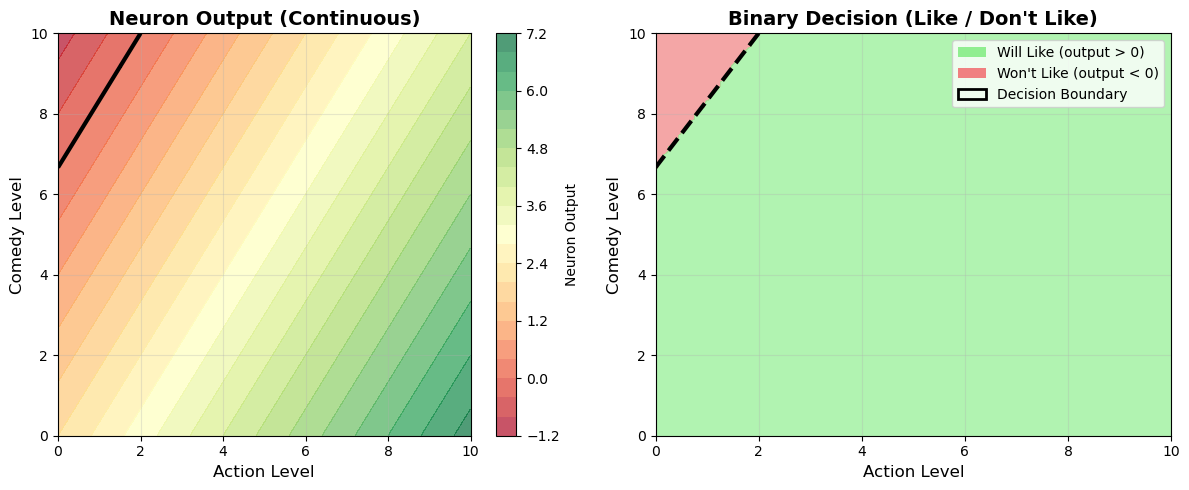


🎬 Movie Preference Neuron:
   Weight for Action: 0.5 (positive = likes action)
   Weight for Comedy: -0.3 (negative = dislikes comedy)
   Bias: 2.0

   The black line is the decision boundary!
   Green area = will like the movie (neuron output > 0)
   Red area = won't like the movie (neuron output < 0)


In [25]:
# Create a simple 2D example
# Let's say we're predicting if someone will like a movie based on:
# - x-axis: Action level (0-10)
# - y-axis: Comedy level (0-10)

# Our neuron's weights and bias
weight_action = 0.5   # Likes action somewhat
weight_comedy = -0.3  # Doesn't like comedy much (negative weight!)
bias = 2.0           # Slightly positive baseline

# Create a grid of points
action_levels = np.linspace(0, 10, 100)
comedy_levels = np.linspace(0, 10, 100)

# Create meshgrid for visualization
X, Y = np.meshgrid(action_levels, comedy_levels)

# Calculate neuron output for each point
# Z = (action * weight_action) + (comedy * weight_comedy) + bias
Z = (X * weight_action) + (Y * weight_comedy) + bias

# Create the plot
plt.figure(figsize=(12, 5))

# Left plot: Continuous output (heatmap)
plt.subplot(1, 2, 1)
contour = plt.contourf(X, Y, Z, levels=20, cmap='RdYlGn', alpha=0.7)
plt.colorbar(contour, label='Neuron Output')
plt.contour(X, Y, Z, levels=[0], colors='black', linewidths=3)  # Decision boundary
plt.xlabel('Action Level', fontsize=12)
plt.ylabel('Comedy Level', fontsize=12)
plt.title('Neuron Output (Continuous)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Right plot: Binary decision (will like / won't like)
plt.subplot(1, 2, 2)
# Create binary mask (1 if output > 0, else 0)
Z_binary = (Z > 0).astype(int)
plt.contourf(X, Y, Z_binary, levels=1, colors=['lightcoral', 'lightgreen'], alpha=0.7)
plt.contour(X, Y, Z, levels=[0], colors='black', linewidths=3, linestyles='--')
plt.xlabel('Action Level', fontsize=12)
plt.ylabel('Comedy Level', fontsize=12)
plt.title('Binary Decision (Like / Don\'t Like)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightgreen', label='Will Like (output > 0)'),
    Patch(facecolor='lightcoral', label='Won\'t Like (output < 0)'),
    Patch(facecolor='none', edgecolor='black', linewidth=2, label='Decision Boundary')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

print(f"\n🎬 Movie Preference Neuron:")
print(f"   Weight for Action: {weight_action} (positive = likes action)")
print(f"   Weight for Comedy: {weight_comedy} (negative = dislikes comedy)")
print(f"   Bias: {bias}")
print(f"\n   The black line is the decision boundary!")
print(f"   Green area = will like the movie (neuron output > 0)")
print(f"   Red area = won't like the movie (neuron output < 0)")

### 📐 Deriving the Decision Boundary Equation

Let's understand **mathematically** how we get the decision boundary from our neuron formula!

**Starting with the neuron equation:**
$$\text{output} = w_1 \times x_1 + w_2 \times x_2 + b$$

**The decision boundary is where output = 0** (the line separating positive from negative predictions):
$$0 = w_1 \times x_1 + w_2 \times x_2 + b$$

**Solving for x₂** (to get the line equation in y = mx + c form):
$$w_2 \times x_2 = -w_1 \times x_1 - b$$
$$x_2 = -\frac{w_1}{w_2} \times x_1 - \frac{b}{w_2}$$

This is in the form **y = mx + c** where:
- **Slope (m)** = $-\frac{w_1}{w_2}$ (determined by weights)
- **Y-intercept (c)** = $-\frac{b}{w_2}$ (determined by bias)

💡 **Key Insight**: The **weights control the slope** (angle/orientation), and the **bias controls the y-intercept** (position)!


### 🔍 Understanding the Decision Boundary

The black line is where the neuron's output equals exactly 0. This is called the **decision boundary**.

The equation of this line is:
```
0 = (action × 0.5) + (comedy × -0.3) + 2.0
```

Rearranging:
```
comedy = (2.0 + 0.5 × action) / 0.3
```

**Key insight:** A single neuron creates a **linear** (straight line) decision boundary! It can only separate data that's linearly separable.

🎬 Movie Preference Example:


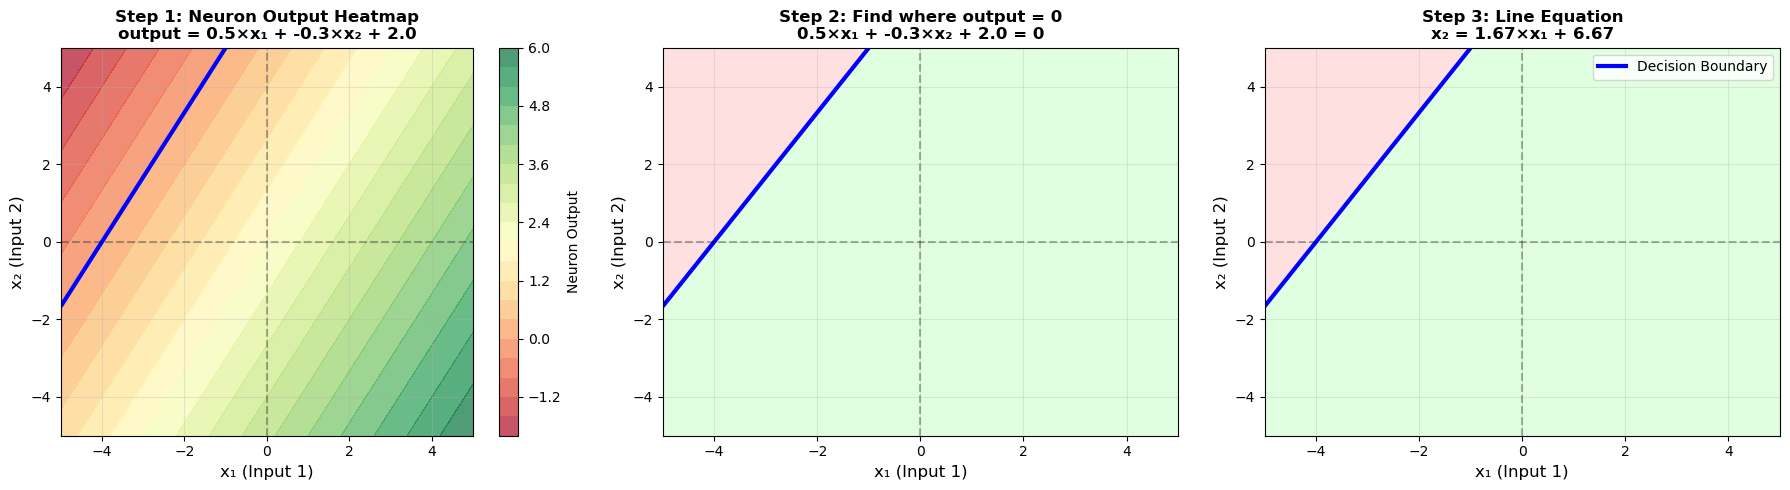


📐 Mathematical Derivation:
   Starting equation: 0.5×x₁ + -0.3×x₂ + 2.0 = 0
   Solve for x₂:
   → -0.3×x₂ = -0.5×x₁ - 2.0
   → x₂ = (-0.5/-0.3)×x₁ + (-2.0/-0.3)
   → x₂ = 1.667×x₁ + 6.667

   Slope: 1.667
   Y-intercept: 6.667


In [27]:
# Let's visualize this derivation step by step!

def plot_decision_boundary_derivation(w1, w2, b):
    """
    Visualize how the decision boundary equation is derived from neuron parameters.
    
    Args:
        w1: Weight for first input (x-axis)
        w2: Weight for second input (y-axis)  
        b: Bias value
    """
    # Create figure with grid
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Create data grid
    x1_range = np.linspace(-5, 5, 200)
    x2_range = np.linspace(-5, 5, 200)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    # Calculate neuron output for each point
    Z = w1 * X1 + w2 * X2 + b
    
    # PLOT 1: Show the continuous output
    ax1 = axes[0]
    contour = ax1.contourf(X1, X2, Z, levels=20, cmap='RdYlGn', alpha=0.7)
    decision_line = ax1.contour(X1, X2, Z, levels=[0], colors='blue', linewidths=3)
    plt.colorbar(contour, ax=ax1, label='Neuron Output')
    ax1.set_xlabel('x₁ (Input 1)', fontsize=12)
    ax1.set_ylabel('x₂ (Input 2)', fontsize=12)
    ax1.set_title('Step 1: Neuron Output Heatmap\n' + 
                  f'output = {w1}×x₁ + {w2}×x₂ + {b}', 
                  fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    
    # PLOT 2: Highlight where output = 0
    ax2 = axes[1]
    # Create binary mask
    Z_binary = (Z > 0).astype(int)
    ax2.contourf(X1, X2, Z_binary, levels=1, colors=['#ffcccc', '#ccffcc'], alpha=0.6)
    ax2.contour(X1, X2, Z, levels=[0], colors='blue', linewidths=3)
    ax2.set_xlabel('x₁ (Input 1)', fontsize=12)
    ax2.set_ylabel('x₂ (Input 2)', fontsize=12)
    ax2.set_title('Step 2: Find where output = 0\n' +
                  f'{w1}×x₁ + {w2}×x₂ + {b} = 0',
                  fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    
    # PLOT 3: Show the final decision boundary line equation
    ax3 = axes[2]
    ax3.contourf(X1, X2, Z_binary, levels=1, colors=['#ffcccc', '#ccffcc'], alpha=0.6)
    
    # Calculate slope and intercept
    if w2 != 0:
        slope = -w1 / w2
        intercept = -b / w2
        
        # Plot the line using the derived equation
        x1_line = np.linspace(-5, 5, 100)
        x2_line = slope * x1_line + intercept
        ax3.plot(x1_line, x2_line, 'b-', linewidth=3, label='Decision Boundary')
        
        ax3.set_title(f'Step 3: Line Equation\n' +
                     f'x₂ = {slope:.2f}×x₁ + {intercept:.2f}',
                     fontsize=12, fontweight='bold')
    else:
        # Vertical line case
        x1_line = -b / w1
        ax3.axvline(x=x1_line, color='blue', linewidth=3, label='Decision Boundary')
        ax3.set_title(f'Step 3: Vertical Line\nx₁ = {x1_line:.2f}',
                     fontsize=12, fontweight='bold')
    
    ax3.set_xlabel('x₁ (Input 1)', fontsize=12)
    ax3.set_ylabel('x₂ (Input 2)', fontsize=12)
    ax3.set_xlim(-5, 5)
    ax3.set_ylim(-5, 5)
    ax3.grid(True, alpha=0.3)
    ax3.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax3.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    ax3.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print the mathematical steps
    print("\n📐 Mathematical Derivation:")
    print(f"   Starting equation: {w1}×x₁ + {w2}×x₂ + {b} = 0")
    
    if w2 != 0:
        print(f"   Solve for x₂:")
        print(f"   → {w2}×x₂ = -{w1}×x₁ - {b}")
        print(f"   → x₂ = ({-w1}/{w2})×x₁ + ({-b}/{w2})")
        print(f"   → x₂ = {-w1/w2:.3f}×x₁ + {-b/w2:.3f}")
        print(f"\n   Slope: {-w1/w2:.3f}")
        print(f"   Y-intercept: {-b/w2:.3f}")
    else:
        print(f"   Special case: w₂ = 0 (vertical line)")
        print(f"   → x₁ = {-b/w1:.3f}")

# Example: Let's derive the boundary for our movie preference neuron
print("🎬 Movie Preference Example:")
plot_decision_boundary_derivation(w1=0.5, w2=-0.3, b=2.0)


### 🔄 How Weights Control Boundary Orientation

Now let's see how **changing weights rotates** the decision boundary!


🎯 Exploring Different Weight Combinations:


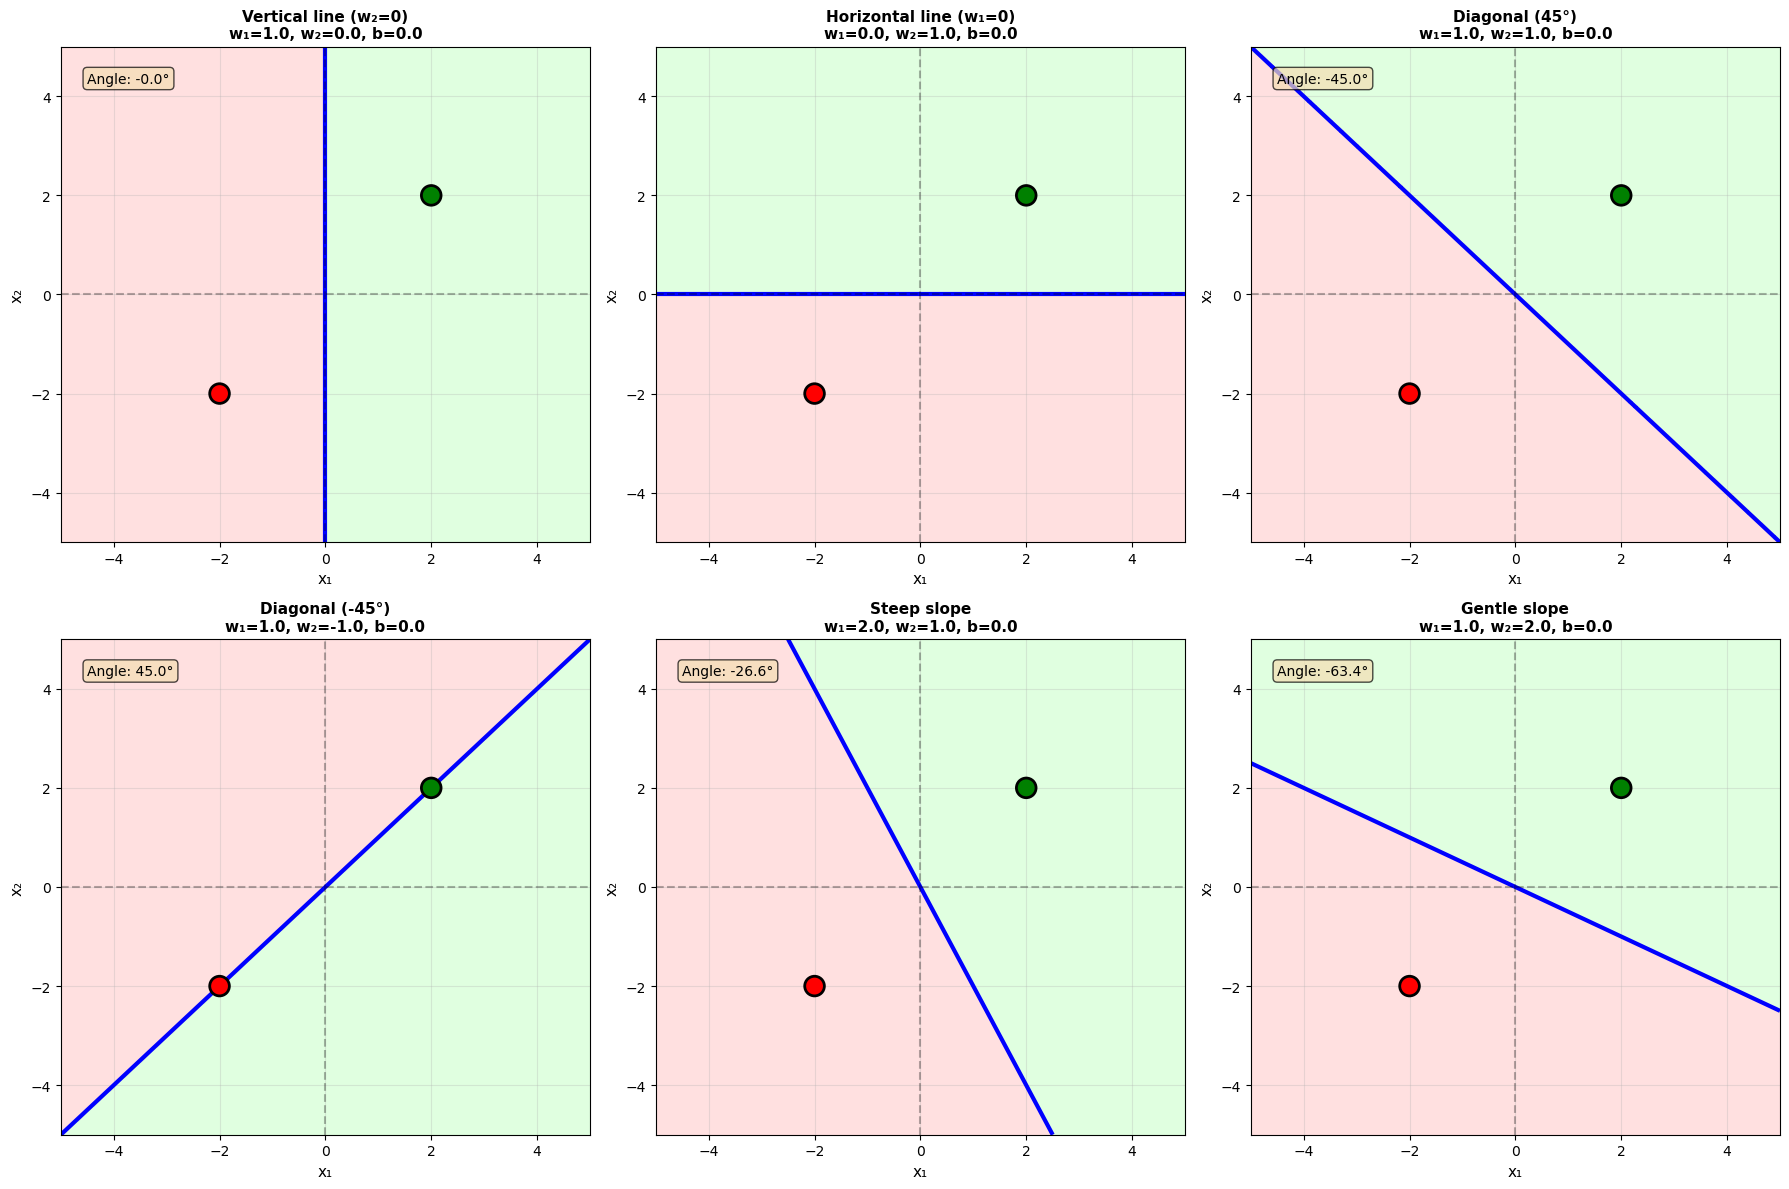


🔄 Key Observations:
   • When w₁ changes: boundary rotates around origin
   • When w₂ changes: boundary rotates around origin
   • Ratio w₁/w₂ determines the slope
   • Weights control ORIENTATION, not POSITION
   • Bias will shift the line (we'll see this next!)


In [28]:
def visualize_weight_rotation(fixed_bias=0.0):
    """
    Show how different weight combinations create different boundary orientations.
    
    Args:
        fixed_bias: Keep bias constant to isolate weight effects
    """
    # Create a 2x3 grid of subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    # Different weight combinations to try
    weight_combinations = [
        (1.0, 0.0, "Vertical line (w₂=0)"),
        (0.0, 1.0, "Horizontal line (w₁=0)"),
        (1.0, 1.0, "Diagonal (45°)"),
        (1.0, -1.0, "Diagonal (-45°)"),
        (2.0, 1.0, "Steep slope"),
        (1.0, 2.0, "Gentle slope"),
    ]
    
    # Create data grid
    x1_range = np.linspace(-5, 5, 100)
    x2_range = np.linspace(-5, 5, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    for idx, (w1, w2, description) in enumerate(weight_combinations):
        ax = axes[idx]
        
        # Calculate neuron output
        Z = w1 * X1 + w2 * X2 + fixed_bias
        Z_binary = (Z > 0).astype(int)
        
        # Plot regions
        ax.contourf(X1, X2, Z_binary, levels=1, colors=['#ffcccc', '#ccffcc'], alpha=0.6)
        ax.contour(X1, X2, Z, levels=[0], colors='blue', linewidths=3)
        
        # Add sample points
        ax.scatter([2, -2], [2, -2], c=['green', 'red'], s=200, 
                  edgecolors='black', linewidths=2, zorder=5)
        
        # Formatting
        ax.set_xlabel('x₁', fontsize=11)
        ax.set_ylabel('x₂', fontsize=11)
        ax.set_title(f'{description}\nw₁={w1}, w₂={w2}, b={fixed_bias}',
                    fontsize=11, fontweight='bold')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        ax.axvline(x=0, color='k', linestyle='--', alpha=0.3)
        
        # Calculate and display angle
        if w1 != 0:
            angle = np.degrees(np.arctan(-w2/w1))
            ax.text(0.05, 0.95, f'Angle: {angle:.1f}°', 
                   transform=ax.transAxes, fontsize=10,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    print("\n🔄 Key Observations:")
    print("   • When w₁ changes: boundary rotates around origin")
    print("   • When w₂ changes: boundary rotates around origin")
    print("   • Ratio w₁/w₂ determines the slope")
    print("   • Weights control ORIENTATION, not POSITION")
    print("   • Bias will shift the line (we'll see this next!)")

# Show different boundary orientations
print("🎯 Exploring Different Weight Combinations:")
visualize_weight_rotation(fixed_bias=0.0)


### 🎮 Interactive: Watch Weights Rotate the Boundary

Let's create an interactive demonstration where you can see how changing ONE weight at a time affects the boundary!


🔄 Varying w₁ while keeping w₂ and bias fixed:


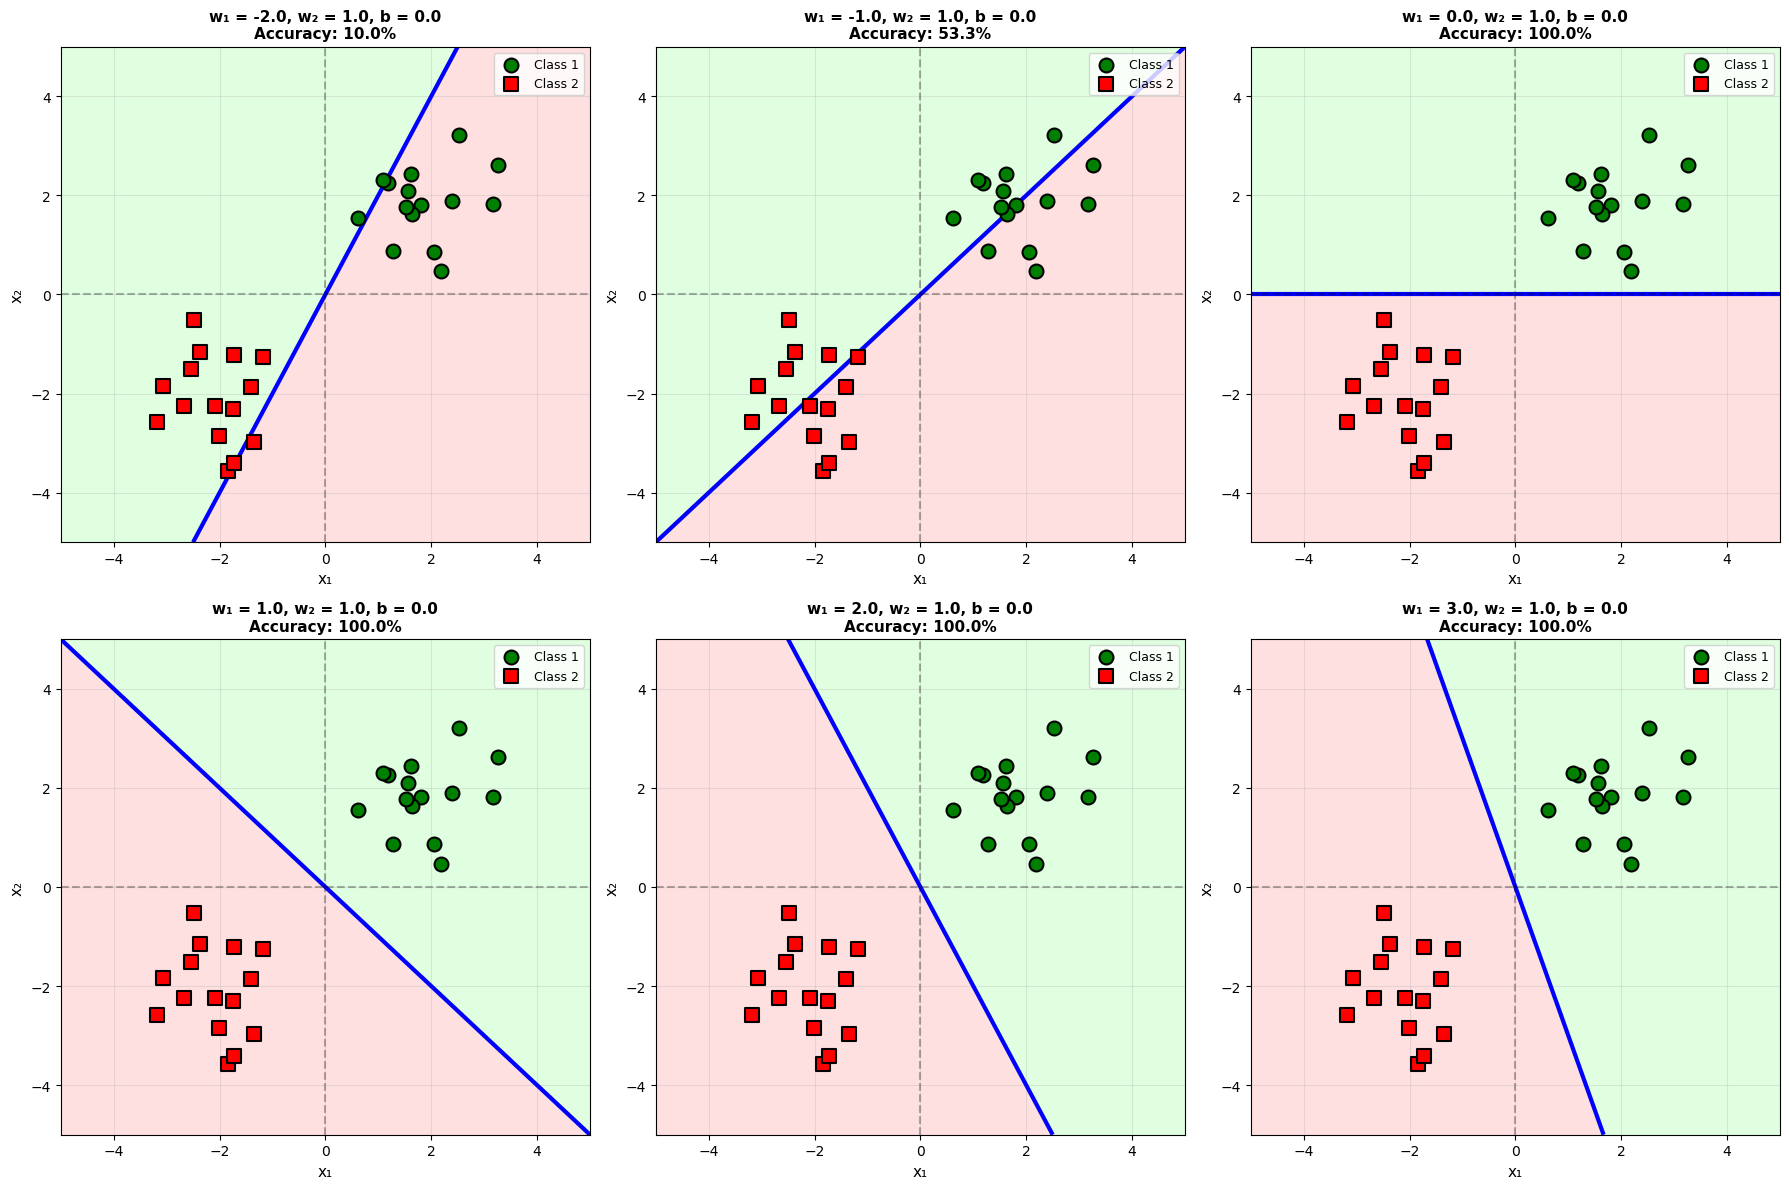


🎯 Experiment Results:
   Fixed parameters: w₂ = 1.0, bias = 0.0
   Varying w₁ from -2.0 to 3.0
   Observation: The boundary ROTATES as w₁ changes!
   Notice how accuracy changes with different boundaries.


In [29]:
def interactive_weight_demo(w1_values, w2_fixed, bias_fixed):
    """
    Show how varying w1 (while keeping w2 and bias fixed) rotates the boundary.
    
    Args:
        w1_values: List of w1 values to try
        w2_fixed: Fixed value for w2
        bias_fixed: Fixed value for bias
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    # Create data grid
    x1_range = np.linspace(-5, 5, 100)
    x2_range = np.linspace(-5, 5, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    # Create sample data points
    np.random.seed(42)
    class1_points = np.random.randn(15, 2) * 0.8 + [2, 2]
    class2_points = np.random.randn(15, 2) * 0.8 - [2, 2]
    
    for idx, w1 in enumerate(w1_values):
        if idx >= len(axes):
            break
            
        ax = axes[idx]
        
        # Calculate neuron output with current w1
        Z = w1 * X1 + w2_fixed * X2 + bias_fixed
        Z_binary = (Z > 0).astype(int)
        
        # Plot decision regions
        ax.contourf(X1, X2, Z_binary, levels=1, colors=['#ffcccc', '#ccffcc'], alpha=0.6)
        ax.contour(X1, X2, Z, levels=[0], colors='blue', linewidths=3)
        
        # Plot sample points
        ax.scatter(class1_points[:, 0], class1_points[:, 1], 
                  c='green', marker='o', s=100, edgecolors='black', 
                  linewidths=1.5, label='Class 1', zorder=5)
        ax.scatter(class2_points[:, 0], class2_points[:, 1], 
                  c='red', marker='s', s=100, edgecolors='black', 
                  linewidths=1.5, label='Class 2', zorder=5)
        
        # Calculate accuracy
        pred1 = w1 * class1_points[:, 0] + w2_fixed * class1_points[:, 1] + bias_fixed
        pred2 = w1 * class2_points[:, 0] + w2_fixed * class2_points[:, 1] + bias_fixed
        acc1 = np.sum(pred1 > 0) / len(pred1) * 100
        acc2 = np.sum(pred2 < 0) / len(pred2) * 100
        total_acc = (acc1 + acc2) / 2
        
        # Formatting
        ax.set_xlabel('x₁', fontsize=11)
        ax.set_ylabel('x₂', fontsize=11)
        ax.set_title(f'w₁ = {w1:.1f}, w₂ = {w2_fixed}, b = {bias_fixed}\n' +
                    f'Accuracy: {total_acc:.1f}%',
                    fontsize=11, fontweight='bold')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        ax.axvline(x=0, color='k', linestyle='--', alpha=0.3)
        ax.legend(loc='upper right', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🎯 Experiment Results:")
    print(f"   Fixed parameters: w₂ = {w2_fixed}, bias = {bias_fixed}")
    print(f"   Varying w₁ from {min(w1_values)} to {max(w1_values)}")
    print(f"   Observation: The boundary ROTATES as w₁ changes!")
    print(f"   Notice how accuracy changes with different boundaries.")

# Run the interactive demo
print("🔄 Varying w₁ while keeping w₂ and bias fixed:")
interactive_weight_demo(
    w1_values=[-2.0, -1.0, 0.0, 1.0, 2.0, 3.0],
    w2_fixed=1.0,
    bias_fixed=0.0
)


### 📧 Real-World Example: Email Spam Classification

Let's apply decision boundaries to a **practical problem**: classifying emails as spam or not spam!

**Features we'll use:**
1. **Word count of "FREE"** (x₁) - spam emails often use this word
2. **Number of exclamation marks** (x₂) - spam emails tend to be more "exciting"

Our neuron will learn: `spam_score = w₁×(count_FREE) + w₂×(exclamation_marks) + bias`


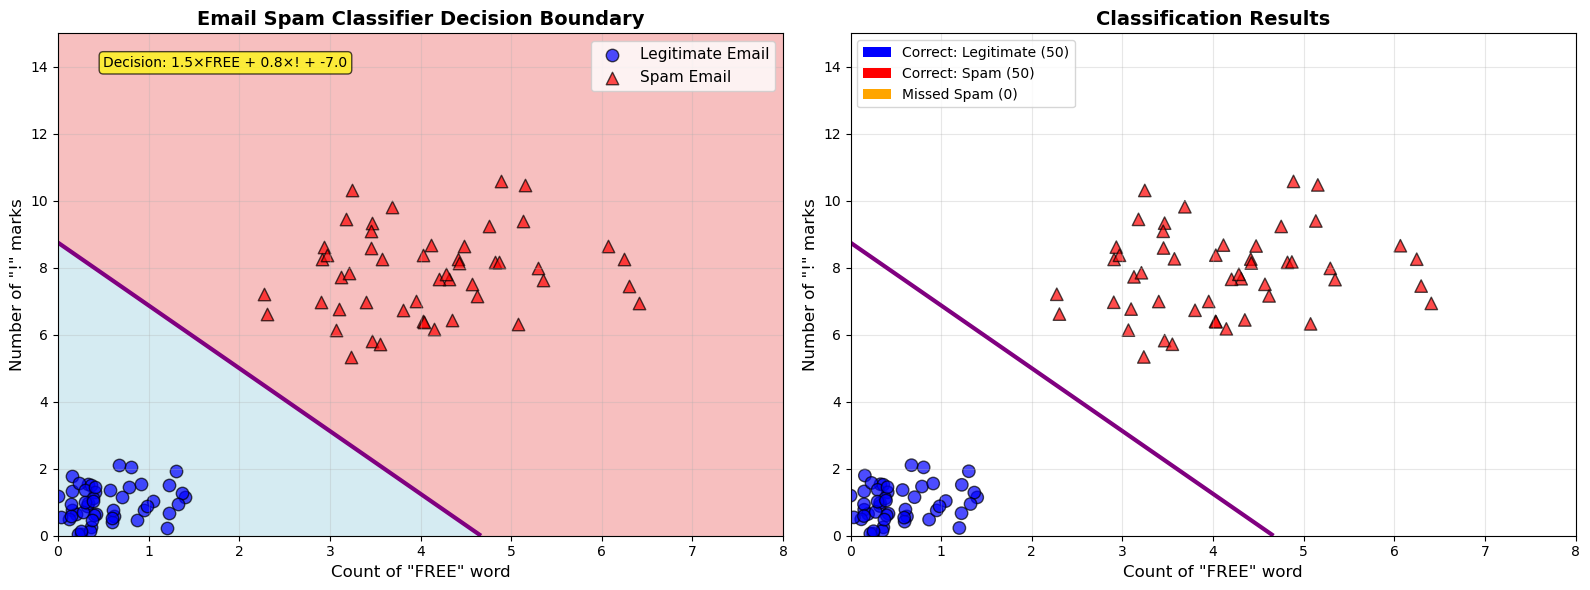


📧 Email Spam Classification Results:

   Neuron Parameters:
   • w₁ (FREE weight): 1.5
   • w₂ (! weight): 0.8
   • bias: -7.0

   Decision Boundary Equation:
   • spam_score = 1.5×(count_FREE) + 0.8×(count_!) + -7.0
   • If spam_score > 0: classify as SPAM
   • If spam_score < 0: classify as LEGITIMATE

   📊 Performance Metrics:
   • Overall Accuracy: 100.0%
   • True Negatives (correct legitimate): 50/50
   • True Positives (correct spam): 50/50
   • False Positives (legitimate marked as spam): 0/50
   • False Negatives (spam marked as legitimate): 0/50

   💡 Interpretation:


In [30]:
# Create synthetic email data
np.random.seed(42)

# LEGITIMATE EMAILS: Low "FREE" count, few exclamation marks
legitimate_emails = np.random.multivariate_normal(
    mean=[0.5, 1.0],  # Average: 0.5 "FREE" mentions, 1 exclamation mark
    cov=[[0.3, 0.1], [0.1, 0.5]],  # Some correlation
    size=50
)

# SPAM EMAILS: High "FREE" count, many exclamation marks
spam_emails = np.random.multivariate_normal(
    mean=[4.0, 8.0],  # Average: 4 "FREE" mentions, 8 exclamation marks
    cov=[[1.0, 0.3], [0.3, 2.0]],
    size=50
)

# Make sure all values are non-negative (can't have negative word counts!)
legitimate_emails = np.abs(legitimate_emails)
spam_emails = np.abs(spam_emails)

# Define our spam detector neuron parameters
# These would normally be learned, but we're setting them manually for demonstration
spam_w1 = 1.5   # Weight for "FREE" count (positive = more FREE → more spam-like)
spam_w2 = 0.8   # Weight for exclamation marks (positive = more ! → more spam-like)
spam_bias = -7.0  # Bias (negative = need strong evidence to classify as spam)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create decision boundary grid
x1_range = np.linspace(0, 8, 200)
x2_range = np.linspace(0, 15, 200)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = spam_w1 * X1 + spam_w2 * X2 + spam_bias

# LEFT PLOT: Show data points and decision boundary
Z_binary = (Z > 0).astype(int)
ax1.contourf(X1, X2, Z_binary, levels=1, 
            colors=['lightblue', 'lightcoral'], alpha=0.5)
ax1.contour(X1, X2, Z, levels=[0], colors='purple', linewidths=3)

# Plot email data points
ax1.scatter(legitimate_emails[:, 0], legitimate_emails[:, 1],
           c='blue', marker='o', s=80, edgecolors='black', linewidths=1,
           label='Legitimate Email', alpha=0.7)
ax1.scatter(spam_emails[:, 0], spam_emails[:, 1],
           c='red', marker='^', s=80, edgecolors='black', linewidths=1,
           label='Spam Email', alpha=0.7)

ax1.set_xlabel('Count of "FREE" word', fontsize=12)
ax1.set_ylabel('Number of "!" marks', fontsize=12)
ax1.set_title('Email Spam Classifier Decision Boundary', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Add decision boundary equation
equation_text = f'Decision: {spam_w1}×FREE + {spam_w2}×! + {spam_bias}'
ax1.text(0.5, 14, equation_text, fontsize=10, 
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# RIGHT PLOT: Show classification results with accuracy
ax2.set_xlim(0, 8)
ax2.set_ylim(0, 15)

# Calculate predictions
legit_scores = spam_w1 * legitimate_emails[:, 0] + spam_w2 * legitimate_emails[:, 1] + spam_bias
spam_scores = spam_w1 * spam_emails[:, 0] + spam_w2 * spam_emails[:, 1] + spam_bias

# Classify
legit_predictions = legit_scores > 0  # True = classified as spam (FALSE POSITIVE)
spam_predictions = spam_scores > 0    # True = correctly classified as spam

# Color based on correct/incorrect classification
legit_colors = ['red' if pred else 'blue' for pred in legit_predictions]
spam_colors = ['red' if pred else 'orange' for pred in spam_predictions]

ax2.scatter(legitimate_emails[:, 0], legitimate_emails[:, 1],
           c=legit_colors, marker='o', s=80, edgecolors='black', linewidths=1,
           alpha=0.7)
ax2.scatter(spam_emails[:, 0], spam_emails[:, 1],
           c=spam_colors, marker='^', s=80, edgecolors='black', linewidths=1,
           alpha=0.7)

ax2.contour(X1, X2, Z, levels=[0], colors='purple', linewidths=3)

ax2.set_xlabel('Count of "FREE" word', fontsize=12)
ax2.set_ylabel('Number of "!" marks', fontsize=12)
ax2.set_title('Classification Results', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Calculate metrics
true_negatives = np.sum(~legit_predictions)  # Correctly classified as legitimate
false_positives = np.sum(legit_predictions)  # Incorrectly classified as spam
true_positives = np.sum(spam_predictions)    # Correctly classified as spam
false_negatives = np.sum(~spam_predictions)  # Incorrectly classified as legitimate

accuracy = (true_positives + true_negatives) / (len(legitimate_emails) + len(spam_emails)) * 100

# Add legend for colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label=f'Correct: Legitimate ({true_negatives})'),
    Patch(facecolor='red', label=f'Correct: Spam ({true_positives})'),
    Patch(facecolor='orange', label=f'Missed Spam ({false_negatives})'),
]
ax2.legend(handles=legend_elements, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

# Print detailed results
print("\n📧 Email Spam Classification Results:")
print(f"\n   Neuron Parameters:")
print(f"   • w₁ (FREE weight): {spam_w1}")
print(f"   • w₂ (! weight): {spam_w2}")
print(f"   • bias: {spam_bias}")
print(f"\n   Decision Boundary Equation:")
print(f"   • spam_score = {spam_w1}×(count_FREE) + {spam_w2}×(count_!) + {spam_bias}")
print(f"   • If spam_score > 0: classify as SPAM")
print(f"   • If spam_score < 0: classify as LEGITIMATE")
print(f"\n   📊 Performance Metrics:")
print(f"   • Overall Accuracy: {accuracy:.1f}%")
print(f"   • True Negatives (correct legitimate): {true_negatives}/{len(legitimate_emails)}")
print(f"   • True Positives (correct spam): {true_positives}/{len(spam_emails)}")
print(f"   • False Positives (legitimate marked as spam): {false_positives}/{len(legitimate_emails)}")
print(f"   • False Negatives (spam marked as legitimate): {false_negatives}/{len(spam_emails)}")

print(f"\n   💡 Interpretation:")
if false_positives > 0:
    print(f"   • {false_positives} legitimate emails were wrongly marked as spam")
    print(f"   • These are near the decision boundary - borderline cases")
if false_negatives > 0:
    print(f"   • {false_negatives} spam emails slipped through!")
    print(f"   • These spam emails didn't use enough trigger words")


### 🔍 Visual Comparison: Different Boundary Slopes

Let's see how **different weight combinations** create boundaries with different slopes, and how this affects classification!


🎨 Comparing Decision Boundaries with Different Slopes:


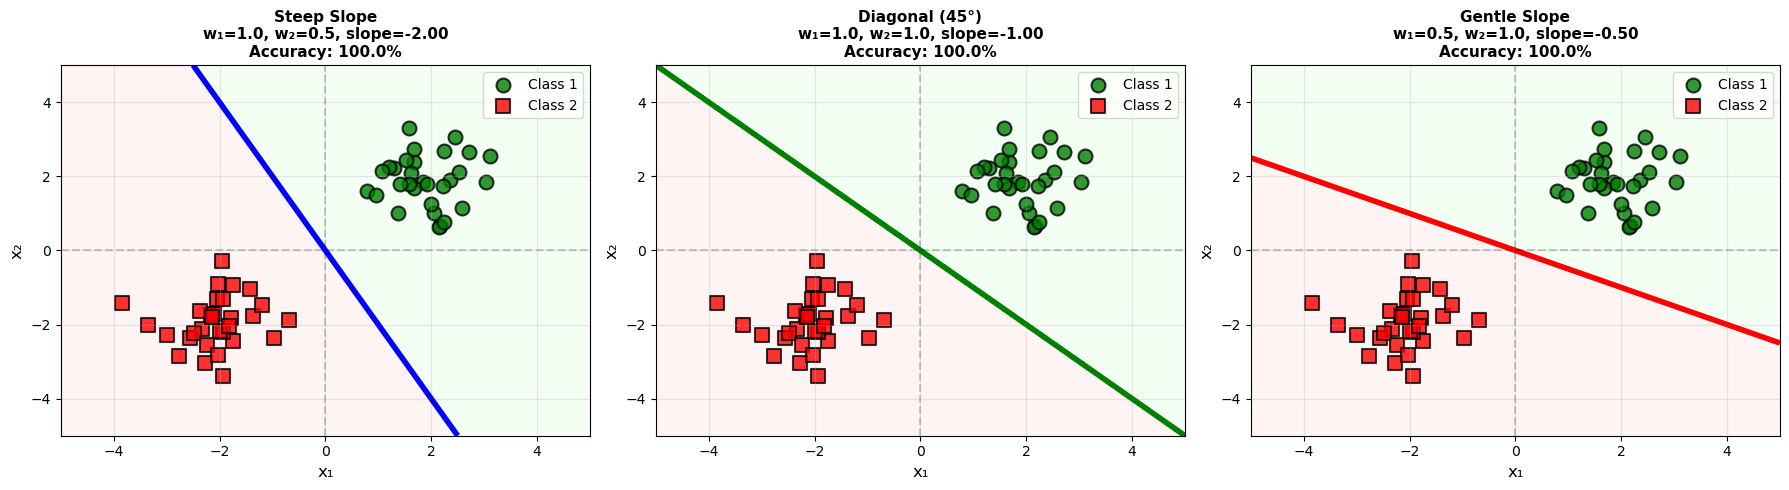


📊 Slope Comparison:

   Steep Slope:
   • Weights: w₁=1.0, w₂=0.5
   • Slope: -2.000
   • Angle: -63.4°

   Diagonal (45°):
   • Weights: w₁=1.0, w₂=1.0
   • Slope: -1.000
   • Angle: -45.0°

   Gentle Slope:
   • Weights: w₁=0.5, w₂=1.0
   • Slope: -0.500
   • Angle: -26.6°


In [31]:
def compare_boundary_slopes():
    """
    Compare three different decision boundaries with different slopes on the same data.
    """
    # Create sample data
    np.random.seed(42)
    class1_data = np.random.randn(30, 2) * 0.7 + [2, 2]
    class2_data = np.random.randn(30, 2) * 0.7 - [2, 2]
    
    # Three different weight combinations (same bias for fair comparison)
    configs = [
        {'w1': 1.0, 'w2': 0.5, 'name': 'Steep Slope', 'color': 'blue'},
        {'w1': 1.0, 'w2': 1.0, 'name': 'Diagonal (45°)', 'color': 'green'},
        {'w1': 0.5, 'w2': 1.0, 'name': 'Gentle Slope', 'color': 'red'},
    ]
    bias = 0.0
    
    # Create figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Grid for contour
    x1_range = np.linspace(-5, 5, 200)
    x2_range = np.linspace(-5, 5, 200)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    for idx, config in enumerate(configs):
        ax = axes[idx]
        w1, w2 = config['w1'], config['w2']
        
        # Calculate decision boundary
        Z = w1 * X1 + w2 * X2 + bias
        Z_binary = (Z > 0).astype(int)
        
        # Plot regions
        ax.contourf(X1, X2, Z_binary, levels=1, 
                   colors=['#ffeeee', '#eeffee'], alpha=0.6)
        ax.contour(X1, X2, Z, levels=[0], colors=config['color'], linewidths=4)
        
        # Plot data
        ax.scatter(class1_data[:, 0], class1_data[:, 1],
                  c='green', marker='o', s=100, edgecolors='black',
                  linewidths=1.5, label='Class 1', alpha=0.8)
        ax.scatter(class2_data[:, 0], class2_data[:, 1],
                  c='red', marker='s', s=100, edgecolors='black',
                  linewidths=1.5, label='Class 2', alpha=0.8)
        
        # Calculate accuracy
        pred1 = w1 * class1_data[:, 0] + w2 * class1_data[:, 1] + bias
        pred2 = w1 * class2_data[:, 0] + w2 * class2_data[:, 1] + bias
        correct1 = np.sum(pred1 > 0)
        correct2 = np.sum(pred2 < 0)
        accuracy = (correct1 + correct2) / (len(class1_data) + len(class2_data)) * 100
        
        # Calculate slope for display
        slope = -w1 / w2 if w2 != 0 else float('inf')
        
        # Formatting
        ax.set_xlabel('x₁', fontsize=12)
        ax.set_ylabel('x₂', fontsize=12)
        ax.set_title(f'{config["name"]}\n' +
                    f'w₁={w1}, w₂={w2}, slope={slope:.2f}\n' +
                    f'Accuracy: {accuracy:.1f}%',
                    fontsize=11, fontweight='bold')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='k', linestyle='--', alpha=0.2)
        ax.axvline(x=0, color='k', linestyle='--', alpha=0.2)
        ax.legend(loc='upper right')
        
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Slope Comparison:")
    for config in configs:
        w1, w2 = config['w1'], config['w2']
        slope = -w1 / w2 if w2 != 0 else float('inf')
        print(f"\n   {config['name']}:")
        print(f"   • Weights: w₁={w1}, w₂={w2}")
        print(f"   • Slope: {slope:.3f}")
        print(f"   • Angle: {np.degrees(np.arctan(slope)):.1f}°")

# Run the comparison
print("🎨 Comparing Decision Boundaries with Different Slopes:")
compare_boundary_slopes()


### 🤔 Think About It

**Question:** Why do we see different accuracy scores for different boundary slopes?

**Answer:** Because the optimal decision boundary depends on how your data is distributed! 

- If data is spread diagonally, a diagonal boundary works best
- If data is spread more horizontally, a gentle slope works better
- The learning process (which we'll cover later) finds the best weights automatically!

💡 **Key Insight:** There's usually ONE best decision boundary for a given dataset. Finding the right weights is what training is all about!


---
## ⚖️ The Role of Bias

You might be wondering: **"Why do we need bias? Can't we just use weights?"**

Great question! Let's see what happens without bias.

### 🎯 Understanding Bias: Intuitive Analogies

Before we dive deeper into bias, let's build intuition with some real-world analogies!

**Analogy 1: Starting Line in a Race** 🏃
- **Without bias**: Everyone starts at the exact same position (origin)
- **With bias**: Some runners get a head start (positive bias) or start behind (negative bias)
- The bias gives you an advantage or disadvantage before the race even begins!

**Analogy 2: Baseline Mood** 😊
- Imagine your mood throughout the day is affected by events (inputs)
- **Without bias**: You start completely neutral (mood = 0)
- **With bias**: You might be naturally optimistic (positive bias, start at +3) or pessimistic (negative bias, start at -2)
- Events then shift your mood up or down from this baseline

**Analogy 3: Credit Score Threshold** 💳
- A loan officer needs to decide: approve or reject a loan
- They look at income and credit score (inputs with weights)
- **Without bias**: If weighted_sum > 0, approve
- **With bias**: The bias acts as a **threshold adjustment**
  - Positive bias = more lenient (easier to get approved)
  - Negative bias = stricter requirements (harder to get approved)

💡 **Key Insight**: Bias shifts the decision boundary WITHOUT changing its orientation. It's like moving a line up/down or left/right without rotating it!


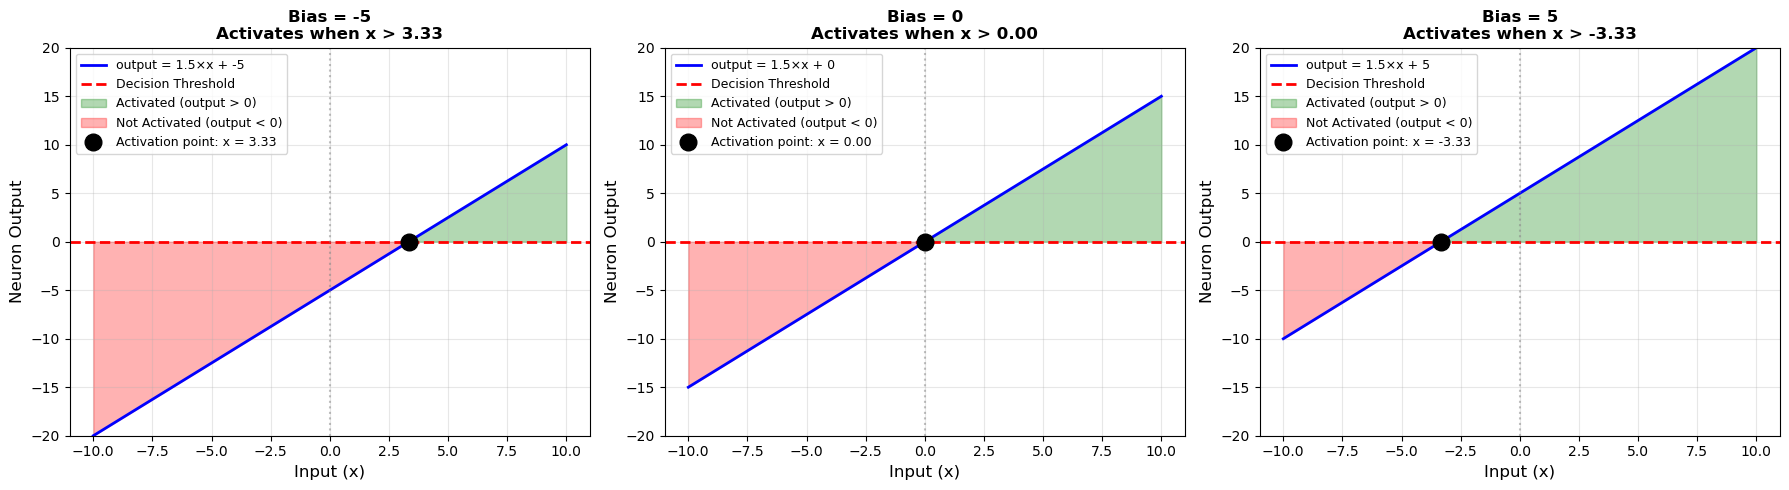


🎯 Bias as Threshold:
   • Negative bias: Requires MORE input to activate (stricter)
   • Zero bias: Activates when input is positive (neutral)
   • Positive bias: Requires LESS input to activate (more lenient)

   Think of bias as setting how 'eager' the neuron is to fire!


In [32]:
# Let's visualize bias as a threshold!

def demonstrate_bias_as_threshold():
    """Show how bias acts as a threshold for activation."""
    # Create a simple 1D example
    inputs = np.linspace(-10, 10, 100)
    weight = 1.5
    
    # Different bias values
    biases = [-5, 0, 5]
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, bias in enumerate(biases):
        ax = axes[idx]
        
        # Calculate neuron output
        outputs = weight * inputs + bias
        
        # Plot
        ax.plot(inputs, outputs, 'b-', linewidth=2, label=f'output = {weight}×x + {bias}')
        ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
        ax.axvline(x=0, color='gray', linestyle=':', alpha=0.5)
        
        # Shade regions
        ax.fill_between(inputs, 0, outputs, where=(outputs >= 0), 
                        alpha=0.3, color='green', label='Activated (output > 0)')
        ax.fill_between(inputs, outputs, 0, where=(outputs < 0), 
                        alpha=0.3, color='red', label='Not Activated (output < 0)')
        
        # Find activation threshold
        threshold = -bias / weight
        ax.plot(threshold, 0, 'ko', markersize=12, label=f'Activation point: x = {threshold:.2f}')
        
        ax.set_xlabel('Input (x)', fontsize=12)
        ax.set_ylabel('Neuron Output', fontsize=12)
        ax.set_title(f'Bias = {bias}\nActivates when x > {threshold:.2f}',
                    fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=9)
        ax.set_ylim(-20, 20)
    
    plt.tight_layout()
    plt.show()
    
    print("\n🎯 Bias as Threshold:")
    print("   • Negative bias: Requires MORE input to activate (stricter)")
    print("   • Zero bias: Activates when input is positive (neutral)")
    print("   • Positive bias: Requires LESS input to activate (more lenient)")
    print("\n   Think of bias as setting how 'eager' the neuron is to fire!")

demonstrate_bias_as_threshold()


### 📊 Side-by-Side: Different Bias Values

Let's see exactly how bias shifts the decision boundary **without rotating it**!


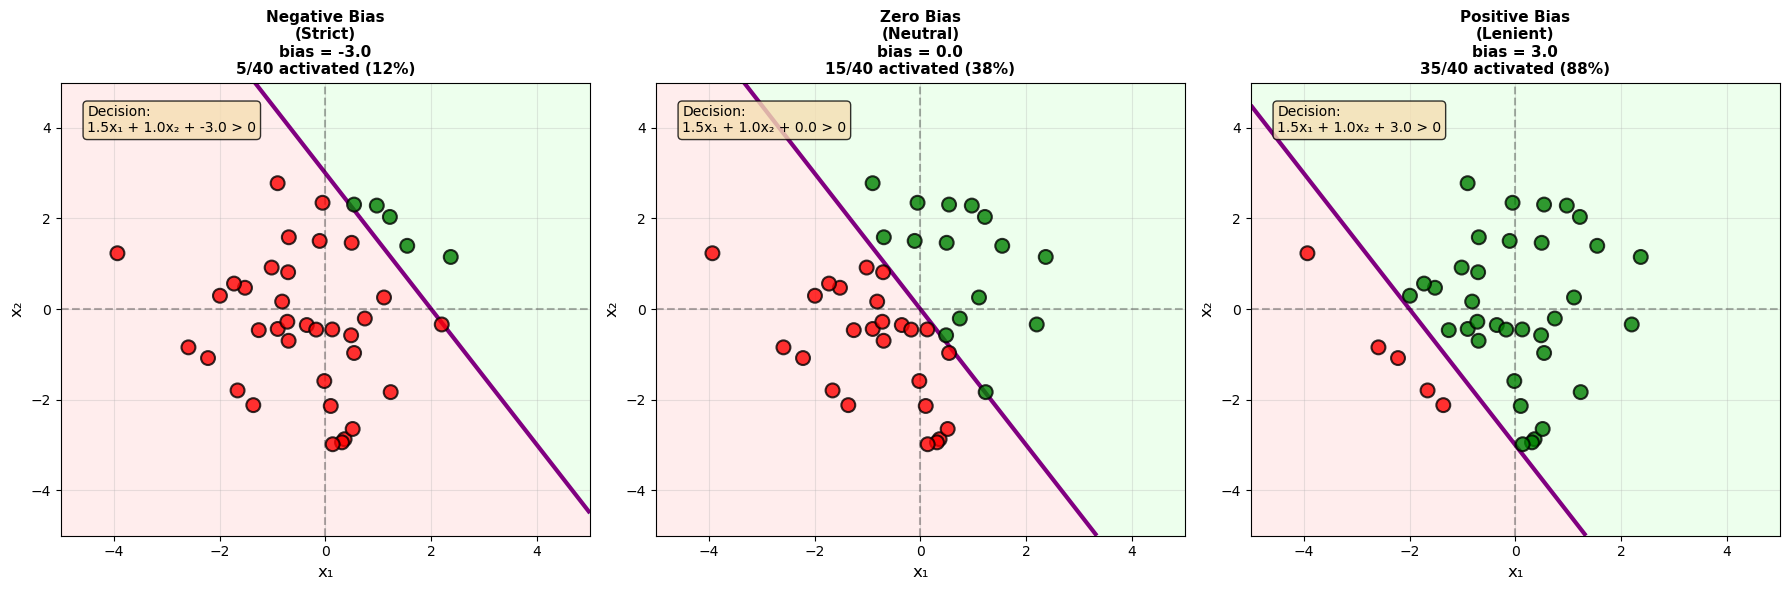


📊 Bias Comparison Results:
   Fixed weights: w₁ = 1.5, w₂ = 1.0
   Notice how the boundary SHIFTS but maintains the same angle!

   Effect of bias:
   • Negative bias (-3.0): Stricter - fewer points activated
   • Zero bias (0.0): Neutral - balanced
   • Positive bias (3.0): Lenient - more points activated


In [33]:
def compare_bias_values():
    """
    Show side-by-side comparison of same weights with different bias values.
    """
    # Fixed weights
    w1, w2 = 1.5, 1.0
    
    # Different bias values
    biases = [-3.0, 0.0, 3.0]
    bias_labels = ['Negative Bias\n(Strict)', 'Zero Bias\n(Neutral)', 'Positive Bias\n(Lenient)']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Create data grid
    x1_range = np.linspace(-5, 5, 100)
    x2_range = np.linspace(-5, 5, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    # Create sample data points (same for all plots)
    np.random.seed(42)
    sample_points = np.random.randn(40, 2) * 1.5
    
    for idx, (bias, label) in enumerate(zip(biases, bias_labels)):
        ax = axes[idx]
        
        # Calculate decision boundary
        Z = w1 * X1 + w2 * X2 + bias
        Z_binary = (Z > 0).astype(int)
        
        # Plot regions
        ax.contourf(X1, X2, Z_binary, levels=1, 
                   colors=['#ffe6e6', '#e6ffe6'], alpha=0.7)
        ax.contour(X1, X2, Z, levels=[0], colors='purple', linewidths=3)
        
        # Plot sample points with colors based on classification
        predictions = w1 * sample_points[:, 0] + w2 * sample_points[:, 1] + bias
        colors = ['green' if pred > 0 else 'red' for pred in predictions]
        ax.scatter(sample_points[:, 0], sample_points[:, 1],
                  c=colors, s=100, edgecolors='black', linewidths=1.5,
                  alpha=0.8, zorder=5)
        
        # Calculate statistics
        num_activated = np.sum(predictions > 0)
        percent_activated = num_activated / len(sample_points) * 100
        
        # Formatting
        ax.set_xlabel('x₁', fontsize=12)
        ax.set_ylabel('x₂', fontsize=12)
        ax.set_title(f'{label}\nbias = {bias}\n' +
                    f'{num_activated}/{len(sample_points)} activated ({percent_activated:.0f}%)',
                    fontsize=11, fontweight='bold')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        ax.axvline(x=0, color='k', linestyle='--', alpha=0.3)
        
        # Add text box showing the decision equation
        eq_text = f'Decision:\n{w1}x₁ + {w2}x₂ + {bias} > 0'
        ax.text(0.05, 0.95, eq_text, transform=ax.transAxes,
               fontsize=10, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Bias Comparison Results:")
    print(f"   Fixed weights: w₁ = {w1}, w₂ = {w2}")
    print(f"   Notice how the boundary SHIFTS but maintains the same angle!")
    print(f"\n   Effect of bias:")
    print(f"   • Negative bias ({biases[0]}): Stricter - fewer points activated")
    print(f"   • Zero bias ({biases[1]}): Neutral - balanced")
    print(f"   • Positive bias ({biases[2]}): Lenient - more points activated")

compare_bias_values()


### 🔄 Visualizing Bias as Boundary Shift

Watch how bias **translates** (shifts) the boundary parallel to itself!


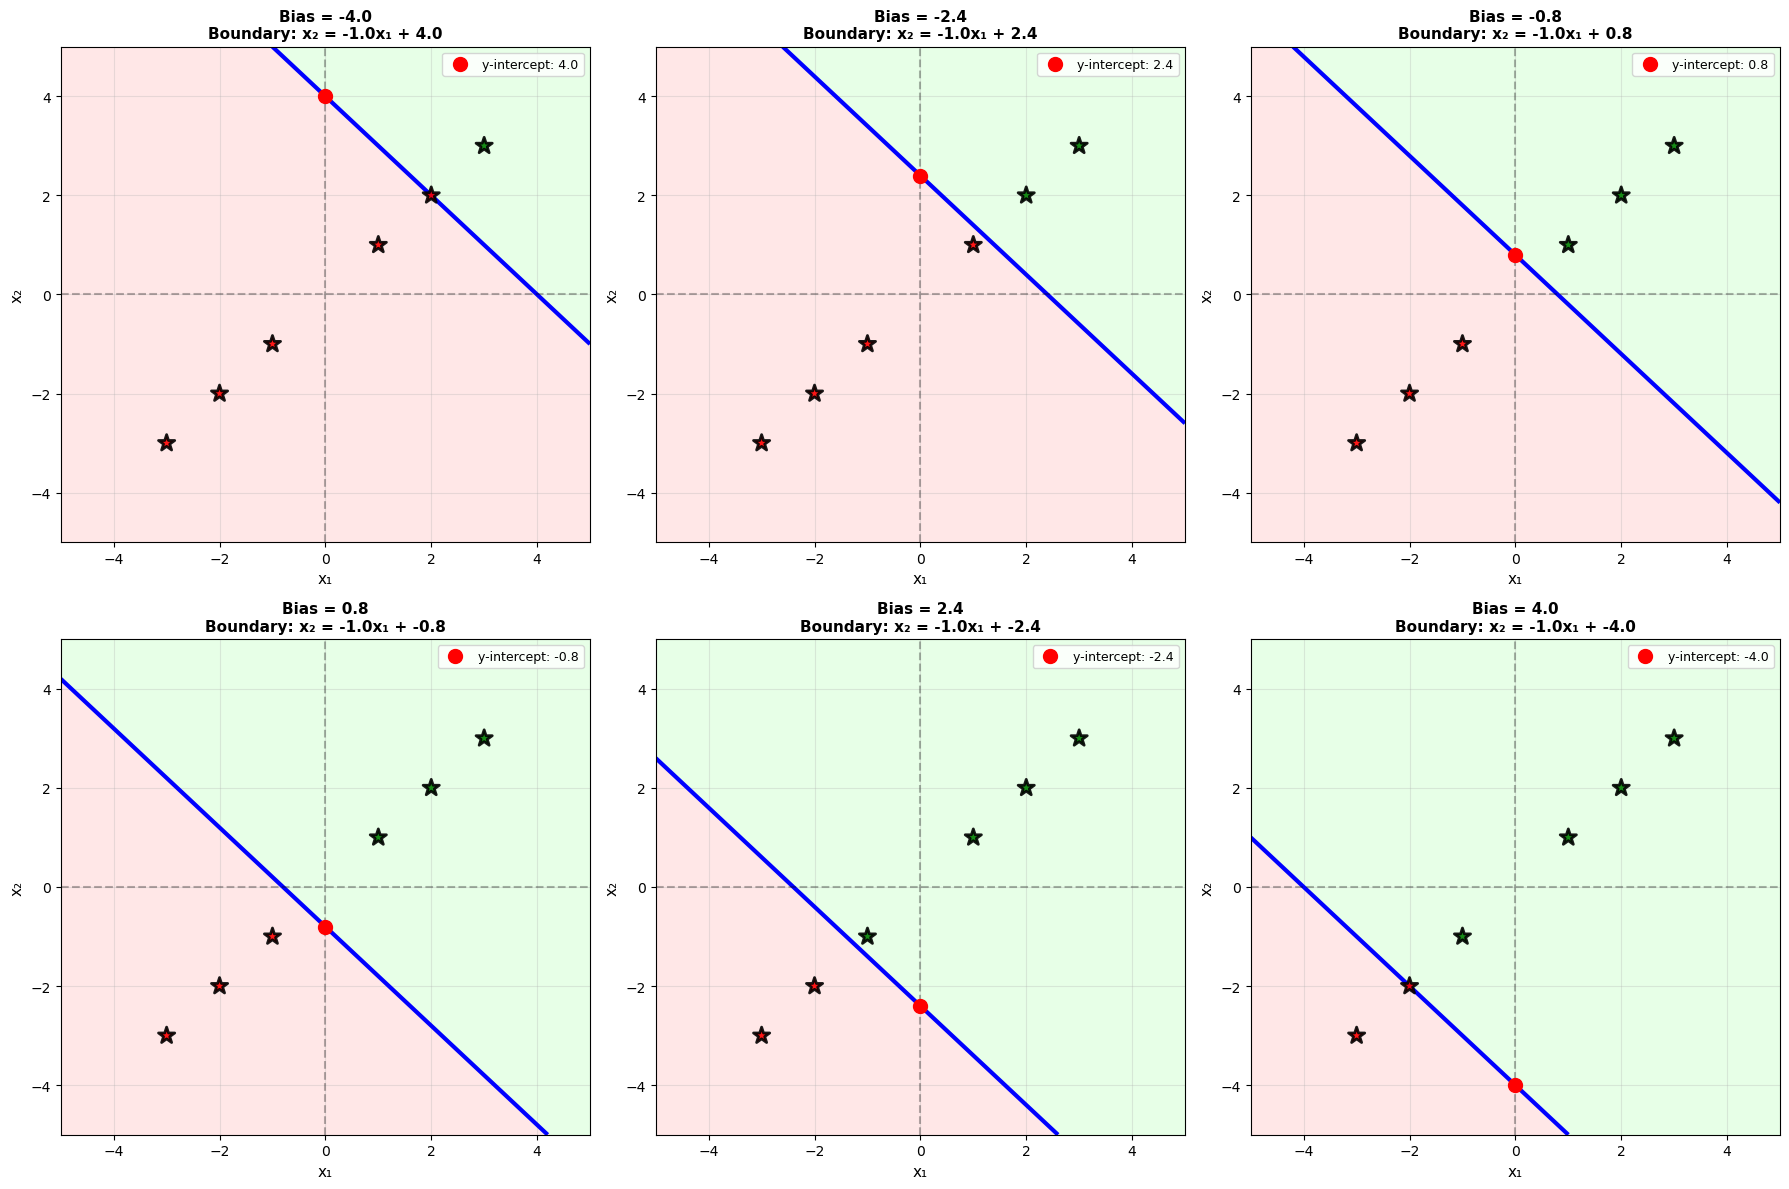


🔄 Bias Shift Animation:
   Fixed weights: w₁ = 1.0, w₂ = 1.0 (diagonal line)
   As bias increases from -4.0 to 4.0:
   • The boundary shifts UP and to the LEFT
   • The slope stays CONSTANT (always -1.0 for these weights)
   • The y-intercept changes from 4.0 to -4.0

   💡 Bias controls POSITION, weights control ORIENTATION!


In [34]:
def animate_bias_shift():
    """
    Show multiple plots demonstrating how bias shifts the boundary.
    """
    # Fixed weights
    w1, w2 = 1.0, 1.0  # Diagonal boundary
    
    # Range of bias values
    bias_values = np.linspace(-4, 4, 6)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    # Create grid
    x1_range = np.linspace(-5, 5, 100)
    x2_range = np.linspace(-5, 5, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    # Create reference points
    np.random.seed(42)
    ref_points = np.array([
        [-3, -3], [-2, -2], [-1, -1],
        [1, 1], [2, 2], [3, 3]
    ])
    
    for idx, bias in enumerate(bias_values):
        ax = axes[idx]
        
        # Calculate decision boundary
        Z = w1 * X1 + w2 * X2 + bias
        Z_binary = (Z > 0).astype(int)
        
        # Plot
        ax.contourf(X1, X2, Z_binary, levels=1,
                   colors=['#ffdddd', '#ddffdd'], alpha=0.7)
        ax.contour(X1, X2, Z, levels=[0], colors='blue', linewidths=3)
        
        # Plot reference points
        predictions = w1 * ref_points[:, 0] + w2 * ref_points[:, 1] + bias
        colors = ['green' if p > 0 else 'red' for p in predictions]
        ax.scatter(ref_points[:, 0], ref_points[:, 1],
                  c=colors, s=150, edgecolors='black', linewidths=2,
                  marker='*', zorder=5, alpha=0.9)
        
        # Formatting
        ax.set_xlabel('x₁', fontsize=11)
        ax.set_ylabel('x₂', fontsize=11)
        ax.set_title(f'Bias = {bias:.1f}\n' +
                    f'Boundary: x₂ = -{w1/w2:.1f}x₁ + {-bias/w2:.1f}',
                    fontsize=11, fontweight='bold')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        ax.axvline(x=0, color='k', linestyle='--', alpha=0.3)
        
        # Highlight y-intercept
        if w2 != 0:
            y_intercept = -bias / w2
            if -5 <= y_intercept <= 5:
                ax.plot(0, y_intercept, 'ro', markersize=10, 
                       label=f'y-intercept: {y_intercept:.1f}')
                ax.legend(fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("\n🔄 Bias Shift Animation:")
    print(f"   Fixed weights: w₁ = {w1}, w₂ = {w2} (diagonal line)")
    print(f"   As bias increases from {bias_values[0]:.1f} to {bias_values[-1]:.1f}:")
    print(f"   • The boundary shifts UP and to the LEFT")
    print(f"   • The slope stays CONSTANT (always -1.0 for these weights)")
    print(f"   • The y-intercept changes from {-bias_values[0]/w2:.1f} to {-bias_values[-1]/w2:.1f}")
    print(f"\n   💡 Bias controls POSITION, weights control ORIENTATION!")

animate_bias_shift()


### ⚖️ Practical Example: Imbalanced Datasets and Bias

Bias becomes **especially critical** when dealing with imbalanced datasets! Let's see why.

**Scenario:** Medical diagnosis where disease is rare (only 5% of population has it)
- Feature 1: Test score A
- Feature 2: Test score B
- Goal: Detect the rare disease



TEST 1: Classifier without bias adjustment


/var/folders/98/5zng120j50n14r9zjqftvvq00000gn/T/ipykernel_40436/2435336401.py:121: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/98/5zng120j50n14r9zjqftvvq00000gn/T/ipykernel_40436/2435336401.py:121: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()


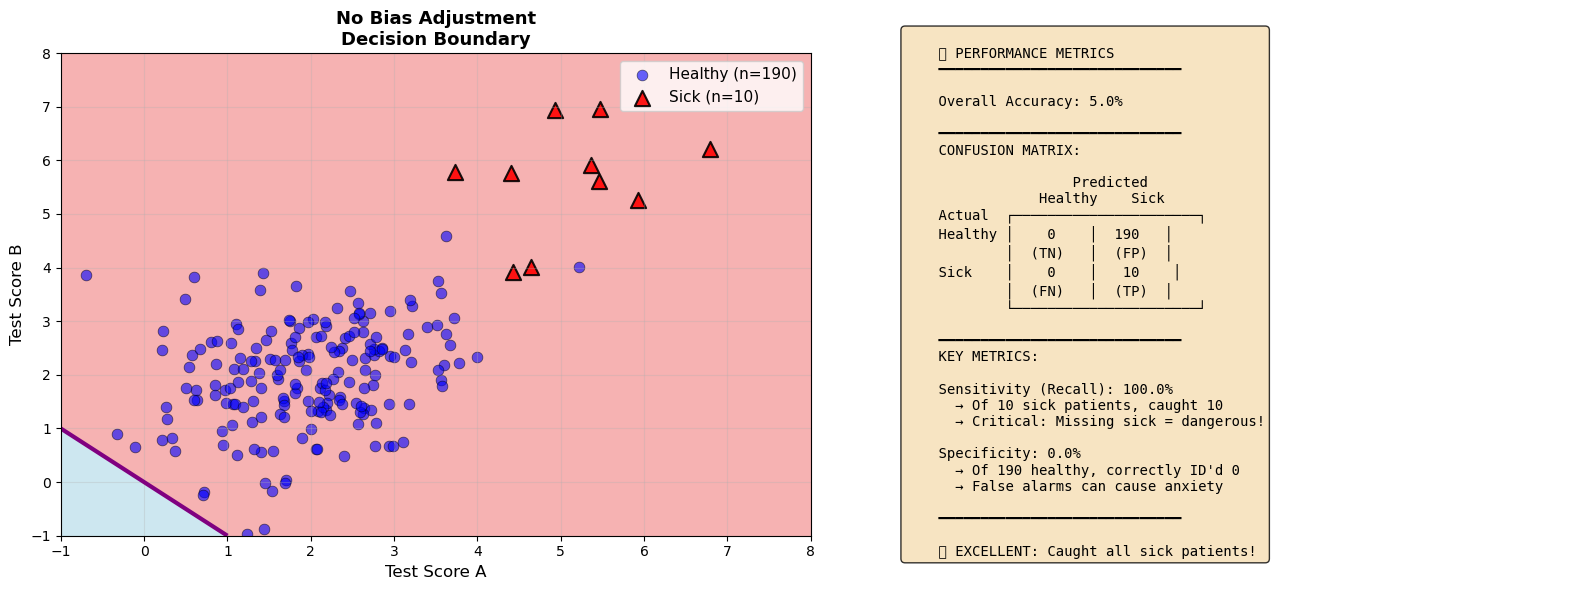


TEST 2: Classifier with NEGATIVE bias (stricter)


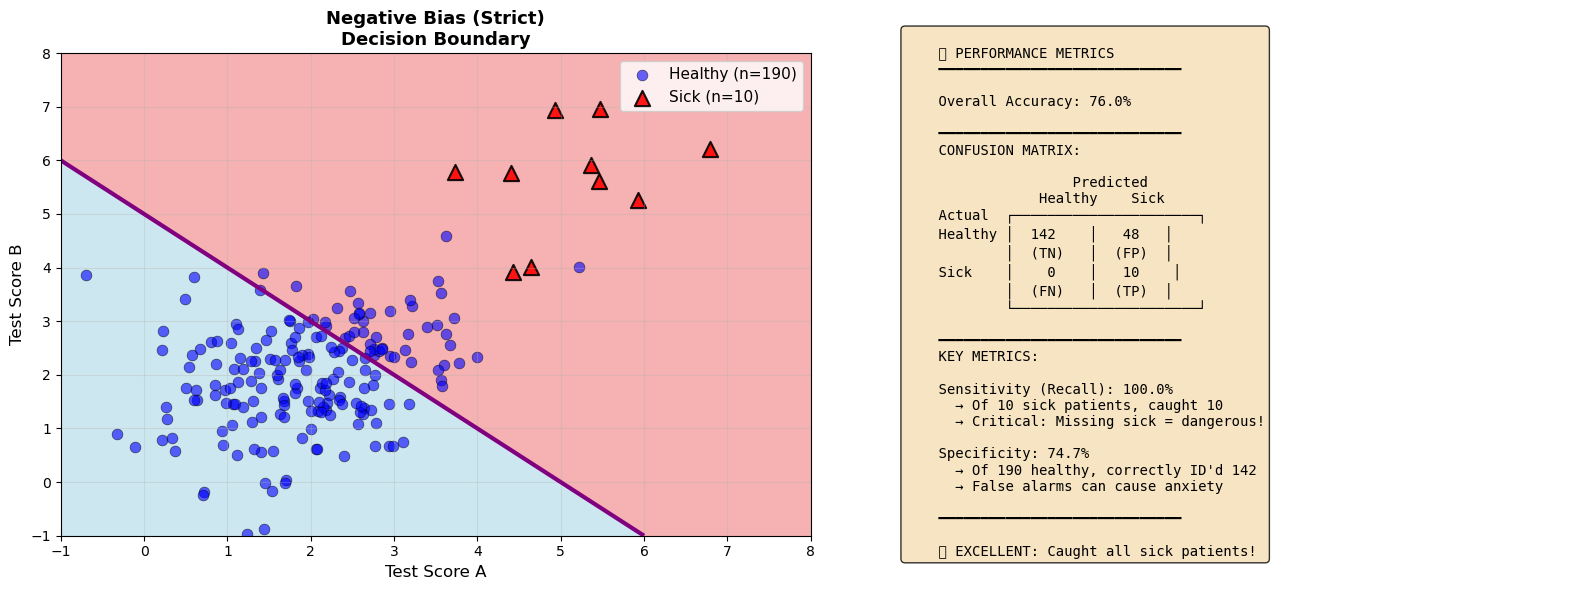


TEST 3: Classifier with POSITIVE bias (more lenient)


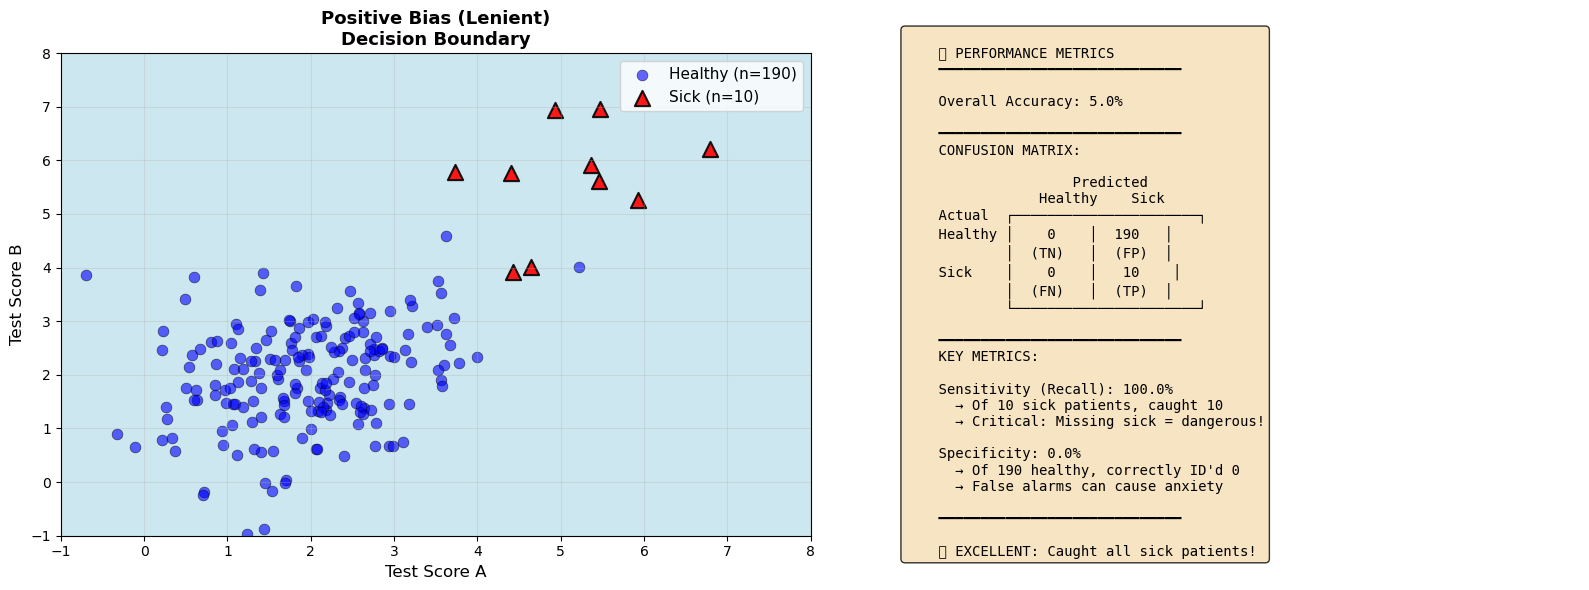


💡 KEY INSIGHTS FROM IMBALANCED DATA:

For imbalanced datasets, accuracy alone is misleading!

1. No bias (b=0): May have high accuracy but miss sick patients
2. Negative bias (b<0): Very strict, might miss even more sick patients
3. Positive bias (b>0): More lenient, catches more sick patients

In medical diagnosis:
  • Missing a sick patient (False Negative) is often WORSE
  • Than alarming a healthy patient (False Positive)
  • So we might prefer POSITIVE bias to increase sensitivity!

💡 Bias helps us make the TRADEOFF between sensitivity and specificity!


In [35]:
# Create imbalanced medical data
np.random.seed(42)

# HEALTHY patients (95% of population): clustered around (2, 2)
healthy_patients = np.random.multivariate_normal(
    mean=[2.0, 2.0],
    cov=[[1.0, 0.3], [0.3, 1.0]],
    size=190  # 95% of 200 total
)

# SICK patients (5% of population): clustered around (5, 5) - different profile
sick_patients = np.random.multivariate_normal(
    mean=[5.0, 5.0],
    cov=[[0.8, 0.2], [0.2, 0.8]],
    size=10  # 5% of 200 total
)

def test_classifier_on_imbalanced_data(w1, w2, bias, title):
    """Test a classifier on imbalanced medical data."""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Create grid
    x1_range = np.linspace(-1, 8, 200)
    x2_range = np.linspace(-1, 8, 200)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    # Calculate decision boundary
    Z = w1 * X1 + w2 * X2 + bias
    
    # LEFT PLOT: Data and boundary
    Z_binary = (Z > 0).astype(int)
    # Z_binary = 0: healthy prediction (score ≤ 0) → lightblue
    # Z_binary = 1: sick prediction (score > 0) → lightcoral
    ax1.contourf(X1, X2, Z_binary, levels=1,
                colors=['lightblue', 'lightcoral'], alpha=0.6)
    ax1.contour(X1, X2, Z, levels=[0], colors='purple', linewidths=3)
    
    ax1.scatter(healthy_patients[:, 0], healthy_patients[:, 1],
               c='blue', marker='o', s=60, alpha=0.6, edgecolors='black',
               linewidths=0.5, label=f'Healthy (n={len(healthy_patients)})')
    ax1.scatter(sick_patients[:, 0], sick_patients[:, 1],
               c='red', marker='^', s=120, alpha=0.9, edgecolors='black',
               linewidths=1.5, label=f'Sick (n={len(sick_patients)})')
    
    ax1.set_xlabel('Test Score A', fontsize=12)
    ax1.set_ylabel('Test Score B', fontsize=12)
    ax1.set_title(f'{title}\nDecision Boundary', fontsize=13, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-1, 8)
    ax1.set_ylim(-1, 8)
    
    # Calculate predictions
    healthy_scores = w1 * healthy_patients[:, 0] + w2 * healthy_patients[:, 1] + bias
    sick_scores = w1 * sick_patients[:, 0] + w2 * sick_patients[:, 1] + bias
    
    # True Negatives: healthy correctly classified as healthy (score < 0)
    true_negatives = np.sum(healthy_scores < 0)
    # False Positives: healthy incorrectly classified as sick (score > 0)
    false_positives = np.sum(healthy_scores > 0)
    # True Positives: sick correctly classified as sick (score > 0)
    true_positives = np.sum(sick_scores > 0)
    # False Negatives: sick incorrectly classified as healthy (score < 0)
    false_negatives = np.sum(sick_scores < 0)
    
    # Calculate metrics
    accuracy = (true_positives + true_negatives) / (len(healthy_patients) + len(sick_patients)) * 100
    
    # Sensitivity (recall): Of all sick patients, how many did we catch?
    sensitivity = true_positives / len(sick_patients) * 100 if len(sick_patients) > 0 else 0
    
    # Specificity: Of all healthy patients, how many did we correctly identify?
    specificity = true_negatives / len(healthy_patients) * 100 if len(healthy_patients) > 0 else 0
    
    # RIGHT PLOT: Confusion Matrix
    ax2.axis('off')
    
    # Create text-based confusion matrix
    confusion_text = f"""
    📊 PERFORMANCE METRICS
    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    
    Overall Accuracy: {accuracy:.1f}%
    
    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    CONFUSION MATRIX:
    
                    Predicted
                Healthy    Sick
    Actual  ┌──────────────────────┐
    Healthy │  {true_negatives:3d}    │  {false_positives:3d}   │
            │  (TN)   │  (FP)  │
    Sick    │  {false_negatives:3d}    │  {true_positives:3d}    │
            │  (FN)   │  (TP)  │
            └──────────────────────┘
    
    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    KEY METRICS:
    
    Sensitivity (Recall): {sensitivity:.1f}%
      → Of {len(sick_patients)} sick patients, caught {true_positives}
      → Critical: Missing sick = dangerous!
    
    Specificity: {specificity:.1f}%
      → Of {len(healthy_patients)} healthy, correctly ID'd {true_negatives}
      → False alarms can cause anxiety
    
    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    """
    
    if false_negatives > 0:
        confusion_text += f"\n    ⚠️  WARNING: {false_negatives} sick patients MISSED!"
    if sensitivity == 100.0:
        confusion_text += f"\n    ✅ EXCELLENT: Caught all sick patients!"
    
    ax2.text(0.1, 0.5, confusion_text, fontsize=10, 
            family='monospace', verticalalignment='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'true_positives': true_positives,
        'false_negatives': false_negatives
    }

# Test 1: No bias adjustment (neutral)
print("\n" + "="*60)
print("TEST 1: Classifier without bias adjustment")
print("="*60)
results1 = test_classifier_on_imbalanced_data(
    w1=1.0, w2=1.0, bias=0.0,
    title="No Bias Adjustment"
)

# Test 2: With negative bias (stricter, fewer false positives)
print("\n" + "="*60)
print("TEST 2: Classifier with NEGATIVE bias (stricter)")
print("="*60)
results2 = test_classifier_on_imbalanced_data(
    w1=1.0, w2=1.0, bias=-5.0,
    title="Negative Bias (Strict)"
)

# Test 3: With positive bias (more lenient, catch more sick patients)
print("\n" + "="*60)
print("TEST 3: Classifier with POSITIVE bias (more lenient)")
print("="*60)
results3 = test_classifier_on_imbalanced_data(
    w1=1.0, w2=1.0, bias=3.0,
    title="Positive Bias (Lenient)"
)

print("\n" + "="*60)
print("💡 KEY INSIGHTS FROM IMBALANCED DATA:")
print("="*60)
print(f"\nFor imbalanced datasets, accuracy alone is misleading!")
print(f"\n1. No bias (b=0): May have high accuracy but miss sick patients")
print(f"2. Negative bias (b<0): Very strict, might miss even more sick patients")
print(f"3. Positive bias (b>0): More lenient, catches more sick patients")
print(f"\nIn medical diagnosis:")
print(f"  • Missing a sick patient (False Negative) is often WORSE")
print(f"  • Than alarming a healthy patient (False Positive)")
print(f"  • So we might prefer POSITIVE bias to increase sensitivity!")
print(f"\n💡 Bias helps us make the TRADEOFF between sensitivity and specificity!")


Confusion Matrix Breakdown:

                    Predicted Healthy (score < 0)	Predicted Sick (score > 0)
Actually Healthy	True Negative (TN) ✓	        False Positive (FP) ✗
Actually Sick	    False Negative (FN) ✗	        True Positive (TP) ✓


### 🎮 Interactive: Complete Parameter Explorer

Now let's create a tool where you can experiment with **both weights AND bias** together!


🎮 INTERACTIVE PARAMETER EXPLORER
Modify these parameters and re-run to explore:



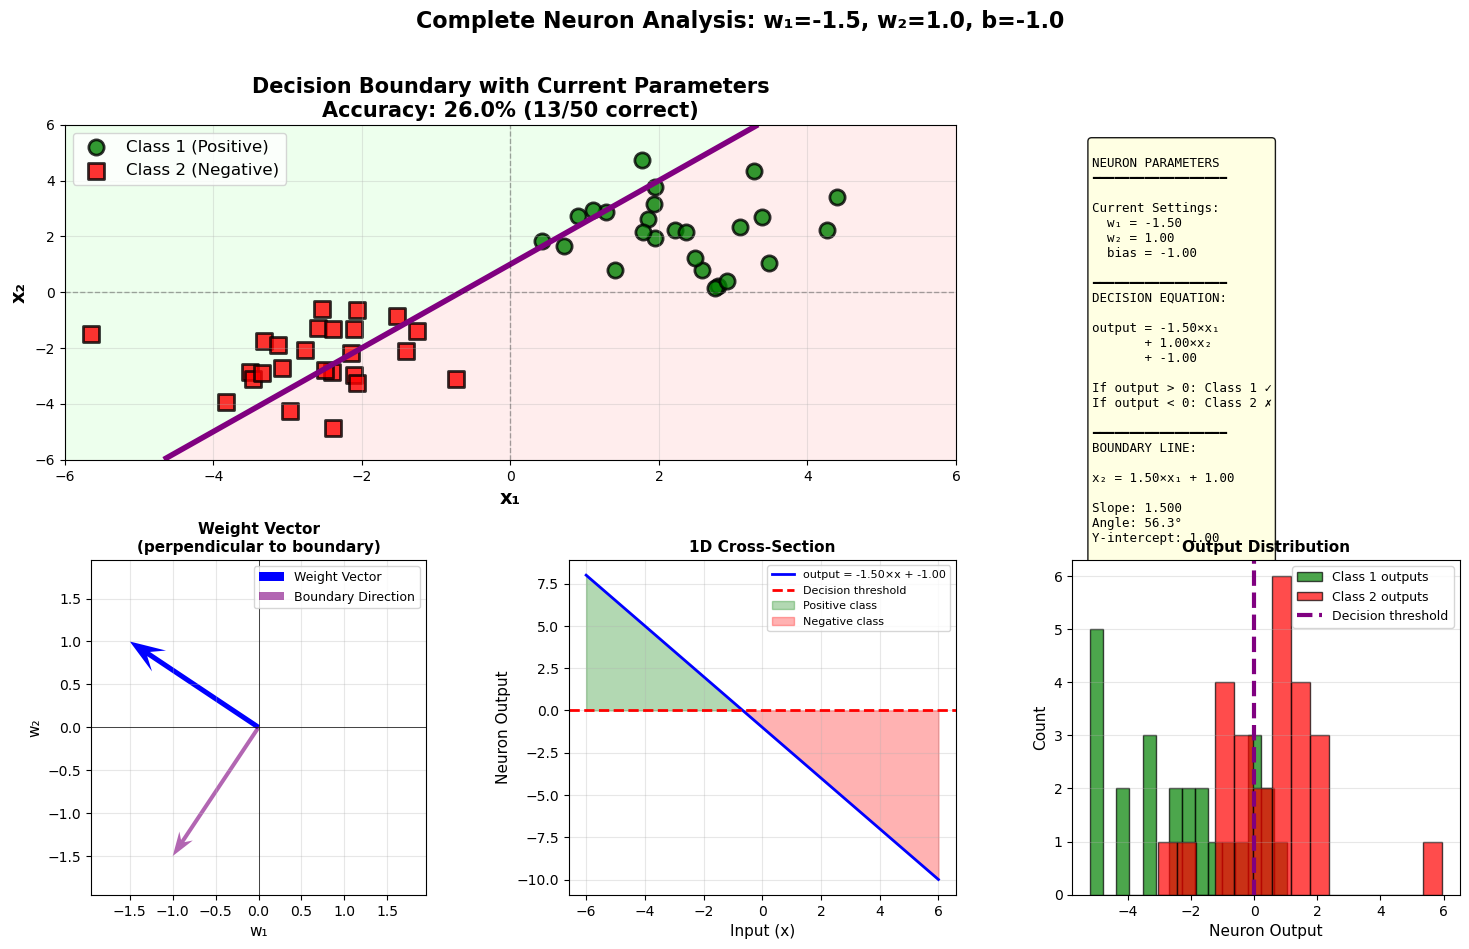


🎯 Try changing the parameters above and re-running!
   Current accuracy: 26.0%
   Experiment with different values to see their effects!


In [37]:
def explore_neuron_parameters(w1, w2, bias):
    """
    Comprehensive visualization showing how all parameters work together.
    
    Args:
        w1: Weight for x₁ (controls slope)
        w2: Weight for x₂ (controls slope)
        bias: Bias (controls position)
    """
    fig = plt.figure(figsize=(18, 10))
    
    # Create grid layout
    gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
    ax1 = fig.add_subplot(gs[0, :2])  # Top: large plot
    ax2 = fig.add_subplot(gs[0, 2])   # Top right: info
    ax3 = fig.add_subplot(gs[1, 0])   # Bottom left
    ax4 = fig.add_subplot(gs[1, 1])   # Bottom middle
    ax5 = fig.add_subplot(gs[1, 2])   # Bottom right
    
    # Generate test data
    np.random.seed(42)
    class1_data = np.random.randn(25, 2) * 1.2 + [2.5, 2.5]
    class2_data = np.random.randn(25, 2) * 1.2 - [2.5, 2.5]
    
    # Create grid
    x1_range = np.linspace(-6, 6, 200)
    x2_range = np.linspace(-6, 6, 200)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    # Calculate decision boundary
    Z = w1 * X1 + w2 * X2 + bias
    Z_binary = (Z > 0).astype(int)
    
    # MAIN PLOT (ax1): Decision boundary with data
    ax1.contourf(X1, X2, Z_binary, levels=1,
                colors=['#ffe6e6', '#e6ffe6'], alpha=0.7)
    boundary = ax1.contour(X1, X2, Z, levels=[0], colors='purple', linewidths=4)
    
    # Plot data points
    ax1.scatter(class1_data[:, 0], class1_data[:, 1],
               c='green', marker='o', s=120, edgecolors='black',
               linewidths=2, label='Class 1 (Positive)', alpha=0.8)
    ax1.scatter(class2_data[:, 0], class2_data[:, 1],
               c='red', marker='s', s=120, edgecolors='black',
               linewidths=2, label='Class 2 (Negative)', alpha=0.8)
    
    # Calculate accuracy
    pred1 = w1 * class1_data[:, 0] + w2 * class1_data[:, 1] + bias
    pred2 = w1 * class2_data[:, 0] + w2 * class2_data[:, 1] + bias
    correct = np.sum(pred1 > 0) + np.sum(pred2 < 0)
    accuracy = correct / (len(class1_data) + len(class2_data)) * 100
    
    ax1.set_xlabel('x₁', fontsize=14, fontweight='bold')
    ax1.set_ylabel('x₂', fontsize=14, fontweight='bold')
    ax1.set_title(f'Decision Boundary with Current Parameters\n' +
                 f'Accuracy: {accuracy:.1f}% ({correct}/{len(class1_data)+len(class2_data)} correct)',
                 fontsize=15, fontweight='bold')
    ax1.legend(fontsize=12, loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-6, 6)
    ax1.set_ylim(-6, 6)
    ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3, linewidth=1)
    ax1.axvline(x=0, color='k', linestyle='--', alpha=0.3, linewidth=1)
    
    # INFO PANEL (ax2)
    ax2.axis('off')
    
    # Calculate derived quantities
    if w2 != 0:
        slope = -w1 / w2
        y_intercept = -bias / w2
        angle = np.degrees(np.arctan(slope))
        info_text = f"""
NEURON PARAMETERS
━━━━━━━━━━━━━━━━━━

Current Settings:
  w₁ = {w1:.2f}
  w₂ = {w2:.2f}
  bias = {bias:.2f}

━━━━━━━━━━━━━━━━━━
DECISION EQUATION:

output = {w1:.2f}×x₁ 
       + {w2:.2f}×x₂ 
       + {bias:.2f}

If output > 0: Class 1 ✓
If output < 0: Class 2 ✗

━━━━━━━━━━━━━━━━━━
BOUNDARY LINE:

x₂ = {slope:.2f}×x₁ + {y_intercept:.2f}

Slope: {slope:.3f}
Angle: {angle:.1f}°
Y-intercept: {y_intercept:.2f}

━━━━━━━━━━━━━━━━━━
EFFECTS:

w₁: {'↑ slope' if w1 > 0 else '↓ slope'}
w₂: {'gentler' if abs(w2) > abs(w1) else 'steeper'}
bias: {'shifts up/left' if bias > 0 else 'shifts down/right' if bias < 0 else 'through origin'}
        """
    else:
        x_intercept = -bias / w1 if w1 != 0 else 0
        info_text = f"""
NEURON PARAMETERS
━━━━━━━━━━━━━━━━━━

Current Settings:
  w₁ = {w1:.2f}
  w₂ = {w2:.2f}
  bias = {bias:.2f}

━━━━━━━━━━━━━━━━━━
SPECIAL CASE:
Vertical boundary!

x₁ = {x_intercept:.2f}
        """
    
    ax2.text(0.05, 0.95, info_text, fontsize=9,
            family='monospace', verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))
    
    # SUBPLOT 3 (ax3): Weight vector visualization
    ax3.quiver(0, 0, w1, w2, angles='xy', scale_units='xy', scale=1,
              color='blue', width=0.015, headwidth=5, headlength=7,
              label='Weight Vector')
    ax3.quiver(0, 0, -w2, w1, angles='xy', scale_units='xy', scale=1,
              color='purple', width=0.012, headwidth=4, headlength=6,
              alpha=0.6, label='Boundary Direction')
    ax3.set_xlabel('w₁', fontsize=11)
    ax3.set_ylabel('w₂', fontsize=11)
    ax3.set_title('Weight Vector\n(perpendicular to boundary)', fontsize=11, fontweight='bold')
    ax3.legend(fontsize=9)
    ax3.grid(True, alpha=0.3)
    ax3.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax3.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    max_val = max(abs(w1), abs(w2), 1) * 1.3
    ax3.set_xlim(-max_val, max_val)
    ax3.set_ylim(-max_val, max_val)
    ax3.set_aspect('equal')
    
    # SUBPLOT 4 (ax4): 1D cross-section
    x_cross = np.linspace(-6, 6, 100)
    # Cross-section along w₁ direction
    y_cross = w1 * x_cross + bias
    ax4.plot(x_cross, y_cross, 'b-', linewidth=2, label=f'output = {w1:.2f}×x + {bias:.2f}')
    ax4.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Decision threshold')
    ax4.fill_between(x_cross, 0, y_cross, where=(y_cross >= 0),
                    alpha=0.3, color='green', label='Positive class')
    ax4.fill_between(x_cross, y_cross, 0, where=(y_cross < 0),
                    alpha=0.3, color='red', label='Negative class')
    ax4.set_xlabel('Input (x)', fontsize=11)
    ax4.set_ylabel('Neuron Output', fontsize=11)
    ax4.set_title('1D Cross-Section', fontsize=11, fontweight='bold')
    ax4.legend(fontsize=8)
    ax4.grid(True, alpha=0.3)
    
    # SUBPLOT 5 (ax5): Activation distribution
    all_outputs = np.concatenate([pred1, pred2])
    ax5.hist(pred1, bins=15, alpha=0.7, color='green', label='Class 1 outputs', edgecolor='black')
    ax5.hist(pred2, bins=15, alpha=0.7, color='red', label='Class 2 outputs', edgecolor='black')
    ax5.axvline(x=0, color='purple', linestyle='--', linewidth=3, label='Decision threshold')
    ax5.set_xlabel('Neuron Output', fontsize=11)
    ax5.set_ylabel('Count', fontsize=11)
    ax5.set_title('Output Distribution', fontsize=11, fontweight='bold')
    ax5.legend(fontsize=9)
    ax5.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle(f'Complete Neuron Analysis: w₁={w1}, w₂={w2}, b={bias}',
                fontsize=16, fontweight='bold', y=0.995)
    
    plt.show()
    
    print(f"\n🎯 Try changing the parameters above and re-running!")
    print(f"   Current accuracy: {accuracy:.1f}%")
    print(f"   Experiment with different values to see their effects!")

# Try it out!
print("🎮 INTERACTIVE PARAMETER EXPLORER")
print("="*60)
print("Modify these parameters and re-run to explore:")
print()

explore_neuron_parameters(w1=-1.5, w2=1.0, bias=-1.0)


### ✍️ Try It Yourself: Challenges

Here are some hands-on exercises to test your understanding!

#### Challenge 1: Perfect Separation 🎯
Can you find weights and bias that achieve **100% accuracy** on the data shown above?

**Hints:**
- Look at where the two classes are centered
- Think about what slope would separate them
- Adjust bias to position the line perfectly

**Task:** Modify the parameters in the cell above and try different combinations!

---

#### Challenge 2: Constraint Puzzle 🧩

You have these constraints:
- Data: Class 1 centered at (3, 2), Class 2 centered at (-2, -3)
- You MUST use w₁ = 1.0 (fixed)
- You can only adjust w₂ and bias

**Questions:**
1. What w₂ value would create a diagonal boundary?
2. What bias would shift it to separate the classes?
3. Can you achieve >90% accuracy with these constraints?

---

#### Challenge 3: Real-World Scenario 🏥

Imagine you're building a medical screening tool:
- High sensitivity is critical (must catch sick patients!)
- Some false positives are acceptable
- Dataset has 10 sick patients, 90 healthy patients

**Task:** Using the imbalanced dataset code above:
1. Adjust bias to achieve >90% sensitivity
2. What happens to specificity?
3. Is this tradeoff acceptable for medical screening?


In [ ]:
# YOUR SOLUTION SPACE FOR CHALLENGES
# ===================================

# Challenge 1: Try to get 100% accuracy
# Modify these values:
challenge1_w1 = 1.0
challenge1_w2 = 1.0  
challenge1_bias = 0.0

print("Challenge 1 Attempt:")
explore_neuron_parameters(challenge1_w1, challenge1_w2, challenge1_bias)

print("\n" + "="*60 + "\n")

# Challenge 2: Fixed w₁ = 1.0, adjust w₂ and bias
challenge2_w1 = 1.0  # FIXED - don't change!
challenge2_w2 = 1.0  # ADJUST THIS
challenge2_bias = 0.0  # ADJUST THIS

print("Challenge 2 Attempt:")
explore_neuron_parameters(challenge2_w1, challenge2_w2, challenge2_bias)


### 🎓 Enhanced Section Summary

Congratulations! You've completed the enhanced decision boundary and bias sections. Here's what you've learned:

#### 📐 Decision Boundaries - Key Concepts

1. **Mathematical Foundation**
   - Decision boundary equation: $x_2 = -\frac{w_1}{w_2}x_1 - \frac{b}{w_2}$
   - Slope determined by weight ratio: $-\frac{w_1}{w_2}$
   - Y-intercept determined by bias: $-\frac{b}{w_2}$

2. **Weight Effects**
   - Weights control **orientation** (rotation)
   - Changing weights rotates the boundary around a point
   - Weight ratio determines the boundary's angle
   - Weight vector is perpendicular to decision boundary

3. **Practical Applications**
   - Spam email classification
   - Movie preference prediction
   - Medical diagnosis
   - Any binary classification task

#### ⚖️ Bias - Key Concepts

1. **Intuitive Understanding**
   - Bias as "starting point" or "baseline"
   - Bias as "threshold" for activation
   - Bias as "default opinion" before seeing data

2. **Mathematical Role**
   - Bias controls **position** (translation)
   - Shifts boundary parallel to itself
   - Does NOT change orientation
   - Allows boundary to not pass through origin

3. **Practical Importance**
   - Critical for imbalanced datasets
   - Controls sensitivity vs. specificity tradeoff
   - Enables fine-tuning of decision threshold
   - Adjusts for class prevalence

#### 💡 Critical Insights

1. **Separation of Concerns**
   - **Weights** → control WHAT DIRECTION to separate
   - **Bias** → control WHERE to place the separation

2. **Tradeoffs**
   - In imbalanced data: bias helps balance sensitivity/specificity
   - Positive bias: more lenient (more activations)
   - Negative bias: stricter (fewer activations)

3. **Limitations**
   - Single neuron = LINEAR boundary only
   - Can't solve non-linearly separable problems (like XOR)
   - Need multiple neurons for complex patterns

#### 🚀 What's Next?

These concepts form the foundation for:
- **Activation functions** (next notebook): Adding non-linearity
- **Multiple neurons**: Creating non-linear boundaries
- **Training**: Learning optimal weights and biases
- **Deep networks**: Composing many neurons for complex patterns


---

## 🚨 Common Pitfalls and Misconceptions



Let's address some common questions and mistakes:



### ❓ "Why do we need bias? Can't we just add another input that's always 1?"



**Great observation!** You absolutely can! In fact, that's mathematically equivalent:



```python

# These two are the same:



# Version 1: Explicit bias

output = w1*x1 + w2*x2 + b



# Version 2: Bias as a weight with input = 1

output = w1*x1 + w2*x2 + w_bias*1

```



We typically keep bias separate just for clarity in code.



### ❓ "Can one neuron solve any problem?"



**No!** A single neuron can only create a **linear decision boundary** (a straight line in 2D, a plane in 3D, etc.).



**The XOR Problem** - Classic example where one neuron fails:


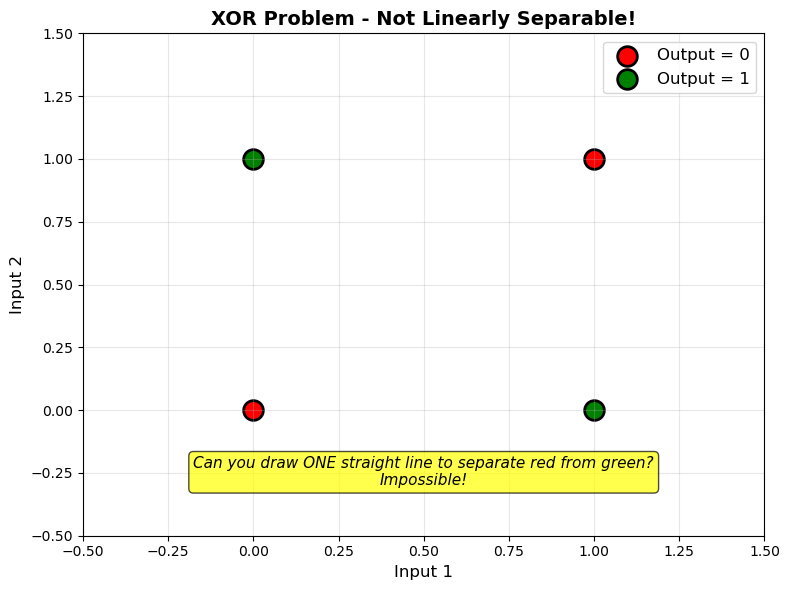


❌ A single neuron CANNOT solve XOR!
   No straight line can separate the red points from green points.

✅ Solution: Use MULTIPLE neurons (next notebook!)
   With 2+ neurons, we can create non-linear decision boundaries.


In [38]:
# XOR (exclusive OR) problem
# Output is 1 if inputs are different, 0 if same
# (0,0) -> 0
# (0,1) -> 1
# (1,0) -> 1
# (1,1) -> 0

plt.figure(figsize=(8, 6))

# Plot XOR points
plt.scatter([0, 1], [0, 1], c='red', s=200, marker='o', edgecolors='black', linewidths=2, label='Output = 0')
plt.scatter([0, 1], [1, 0], c='green', s=200, marker='o', edgecolors='black', linewidths=2, label='Output = 1')

plt.xlabel('Input 1', fontsize=12)
plt.ylabel('Input 2', fontsize=12)
plt.title('XOR Problem - Not Linearly Separable!', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

# Try to draw a straight line that separates red from green
# It's impossible!
plt.text(0.5, -0.3, "Can you draw ONE straight line to separate red from green?\nImpossible!", 
         ha='center', fontsize=11, style='italic',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n❌ A single neuron CANNOT solve XOR!")
print("   No straight line can separate the red points from green points.")
print("\n✅ Solution: Use MULTIPLE neurons (next notebook!)")
print("   With 2+ neurons, we can create non-linear decision boundaries.")

### ❓ "What if all weights are the same?"

**Then all inputs contribute equally!** This might be okay for some problems, but usually different inputs have different importance.

In [39]:
# Example: All weights equal vs different weights
inputs = np.array([1.0, 2.0, 3.0])

# Case 1: All weights equal
weights_equal = np.array([1.0, 1.0, 1.0])
output_equal = neuron_vectorized(inputs, weights_equal, 0.0)

# Case 2: Different weights
weights_different = np.array([0.1, 0.5, 2.0])  # Last input is much more important
output_different = neuron_vectorized(inputs, weights_different, 0.0)

print("Input values:", inputs)
print("\nCase 1 - Equal weights [1.0, 1.0, 1.0]:")
print(f"  Output: {output_equal}")
print(f"  All inputs contribute equally: (1×1) + (2×1) + (3×1) = {output_equal}")

print("\nCase 2 - Different weights [0.1, 0.5, 2.0]:")
print(f"  Output: {output_different}")
print(f"  Last input dominates: (1×0.1) + (2×0.5) + (3×2.0) = {output_different}")
print(f"\n  Notice how the third input (value=3.0, weight=2.0) contributes {3.0*2.0}/{output_different}")
print(f"  = {3.0*2.0/output_different*100:.1f}% of the total output!")

Input values: [1. 2. 3.]

Case 1 - Equal weights [1.0, 1.0, 1.0]:
  Output: 6.0
  All inputs contribute equally: (1×1) + (2×1) + (3×1) = 6.0

Case 2 - Different weights [0.1, 0.5, 2.0]:
  Output: 7.1
  Last input dominates: (1×0.1) + (2×0.5) + (3×2.0) = 7.1

  Notice how the third input (value=3.0, weight=2.0) contributes 6.0/7.1
  = 84.5% of the total output!


### ❓ "Why do we need activation functions?"

**Preview for next notebook!** Right now, our neuron just outputs a number. But:

1. Sometimes we want a **probability** (between 0 and 1)
2. Sometimes we want to **add non-linearity** (curves instead of straight lines)
3. Sometimes we want to **threshold** the output (only activate if strong enough)

That's where **activation functions** come in! We'll explore them in detail in Notebook 3.

---
## 🎯 Key Takeaways

Congratulations! You've learned how a single neuron works. Let's recap:

### 1. **The Neuron Formula**
```
output = (x₁ × w₁) + (x₂ × w₂) + ... + (xₙ × wₙ) + bias
```
- Multiply each input by its weight
- Add them all together
- Add the bias

### 2. **Components**
- **Inputs (x)**: The data we're processing
- **Weights (w)**: How important each input is (learned during training)
- **Bias (b)**: Baseline adjustment (also learned)
- **Output**: The neuron's prediction

### 3. **What Weights Do**
- **Positive weight**: Input contributes positively to output
- **Negative weight**: Input contributes negatively
- **Large absolute value**: Input is very important
- **Small absolute value**: Input matters less

### 4. **What Bias Does**
- Shifts the decision boundary
- Allows flexibility in where the boundary is placed
- Think of it as a "default opinion" before seeing data

### 5. **Limitations**
- Single neuron = linear decision boundary only
- Can't solve problems like XOR
- Need multiple neurons for complex patterns

### 6. **Implementation**
- Can use loops (clear but slow)
- Should use NumPy dot product (fast and efficient)
- Same math, different implementation

---
## 🧪 Practice Exercises

Try these exercises to solidify your understanding:

### Exercise 1: Coffee Decision Neuron
Create a neuron that decides if you should buy a coffee based on:
- Price (dollars)
- Size (ounces)
- Quality rating (1-5 stars)

Choose your own weights and bias!

In [ ]:
# YOUR CODE HERE
# Hint: Use the neuron_vectorized function we created

# Example coffee
coffee = np.array([5.0, 16.0, 4.5])  # [$5, 16oz, 4.5 stars]

# Your weights (choose values that make sense to you!)
weights = np.array([?, ?, ?])  # Replace ? with your choices
bias = ?  # Replace ? with your choice

# Calculate
decision_score = neuron_vectorized(coffee, weights, bias)

print(f"Decision score: {decision_score}")
print(f"Buy coffee? {'Yes!' if decision_score > 0 else 'No'}")

### Exercise 2: Find the Weights
Given these data points, can you find weights and bias that correctly classify them?
- Point A: (1, 1) → Class 0 (red)
- Point B: (2, 3) → Class 1 (green)
- Point C: (3, 2) → Class 1 (green)
- Point D: (1, 2) → Class 0 (red)

In [ ]:
# YOUR CODE HERE
# Try different weight combinations and check if they work

points = np.array([
    [1, 1],  # Class 0 (should output < 0)
    [2, 3],  # Class 1 (should output > 0)
    [3, 2],  # Class 1 (should output > 0)
    [1, 2]   # Class 0 (should output < 0)
])

# Try to find these:
w1 = ?  # weight for x-coordinate
w2 = ?  # weight for y-coordinate
b = ?   # bias

# Check your answer
for i, point in enumerate(points):
    output = neuron_vectorized(point, np.array([w1, w2]), b)
    expected_class = 1 if i in [1, 2] else 0
    predicted_class = 1 if output > 0 else 0
    print(f"Point {i}: {point}, Output: {output:.2f}, Expected: {expected_class}, Predicted: {predicted_class}")

---
## 🚀 What's Next?

Excellent work! You now understand how a single neuron works and can implement it from scratch! 🎉

But we're missing a crucial piece: **activation functions**!

Right now, our neuron just outputs a number (could be any value). In the next notebook, we'll learn:

- **Why we need activation functions** (hint: non-linearity!)
- **Common activation functions**: ReLU, Sigmoid, Tanh
- **How to implement them** from scratch
- **When to use which** activation function
- **How they enable complex patterns** (solving XOR!)

**Ready to add some non-linearity?** → [Continue to Notebook 3: Activation Functions](03_activation_functions.ipynb)

---

*Great job on completing Notebook 2! You're building a strong foundation! 💪*